### 1. Introduction: Project Overview

This project centers around the comprehensive analysis of three distinct datasets: movie Data, critic reviews, and user reviews. The scope of the project encompasses various aspects, including:

- Data Cleaning: Ensuring data integrity and quality for accurate analysis.
- Data Analysis: Identifying and evaluating the best movies based on various metrics.
- Data Visualization: Creating insightful visual representations of the data to facilitate understanding.
- Linear Regression: Applying statistical methods to predict audience scores based on relevant features.
- Natural Language Processing (NLP): Analyzing textual data from reviews to extract meaningful insights.

Below are the summarized details of the three datasets presented in their respective dictionaries:

#### Data Dictionary for `Movies`

| Column Name               | Data Type | Description                                                                                           |
| ------------------------- | --------- | ----------------------------------------------------------------------------------------------------- |
| `movieId`                 | object    | Unique identifier for each movie.                                                                     |
| `movieYear`               | int64     | The year the movie was released.                                                                      |
| `movieURL`                | object    | URL to the movie's page on Rotten Tomatoes.                                                           |
| `movieTitle`              | object    | The title of the movie.                                                                               |
| `critic_score`            | float64   | Average score given by critics for the movie.                                                         |
| `critic_sentiment`        | object    | Sentiment of the critic's reviews (e.g., positive, negative, neutral).                                 |
| `audience_score`          | float64   | Average score given by audience members for the movie.                                                |
| `audience_sentiment`      | object    | Sentiment of audience reviews (e.g., positive, negative, neutral).                                     |
| `release_date_theaters`   | object    | The release date of the movie in theaters.                                                            |
| `release_date_streaming`  | object    | The release date of the movie on streaming platforms.                                                 |
| `rating`                  | object    | The movie's rating (e.g., PG, PG-13, R).                                                              |
| `original_language`       | object    | The original language of the movie (e.g., English, French).                                           |
| `runtime`                 | object    | The runtime of the movie in minutes (may be stored as text in some cases, e.g., "120 minutes").       |

<br/>

#### Data Dictionary for `Critic Reviews`

| Column Name         | Data Type | Description                                                                                           |
| ------------------- | --------- | ----------------------------------------------------------------------------------------------------- |
| `reviewId`          | int64     | Unique identifier for each critic review.                                                             |
| `movieId`           | object    | Unique identifier for the movie that the review corresponds to.                                        |
| `creationDate`      | object    | The date when the review was created or published.                                                     |
| `criticName`        | object    | The name of the critic who wrote the review.                                                           |
| `criticPageUrl`     | object    | URL to the critic's page on Rotten Tomatoes or the publication website.                                |
| `reviewState`       | object    | The state of the review (e.g., published, draft).                                                      |
| `isFresh`           | bool      | A boolean indicator whether the review is categorized as "Fresh" (positive review).                    |
| `isRotten`          | bool      | A boolean indicator whether the review is categorized as "Rotten" (negative review).                   |
| `isRtUrl`           | object    | URL to the Rotten Tomatoes page for this review (if available).                                        |
| `isTopCritic`       | bool      | A boolean indicator whether the review was written by a "Top Critic" on Rotten Tomatoes.               |
| `publicationUrl`    | object    | URL to the publication's homepage or the article containing the review.                                |
| `publicationName`   | object    | The name of the publication where the review was published.                                            |
| `reviewUrl`         | object    | Direct URL to the individual review page on the publication's website.                                 |
| `quote`             | object    | A brief excerpt or quote from the review.                                                              |
| `scoreSentiment`    | object    | The sentiment of the review (e.g., positive, negative).                                                |
| `originalScore`     | object    | The original score given by the critic, if available.                                |

<br/>

#### Data Dictionary for `User Reviews`

| Column Name        | Data Type | Description                                                                                           |
| ------------------ | --------- | ----------------------------------------------------------------------------------------------------- |
| `movieId`          | object    | Unique identifier for the movie that the user review corresponds to.                                   |
| `rating`           | float64   | The rating given by the user, typically a score between 0 and 10 (or similar scale).                   |
| `quote`            | object    | A brief excerpt or comment from the user's review.                                                     |
| `reviewId`         | object    | Unique identifier for each user review.                                                                |
| `isVerified`       | bool      | A boolean indicating whether the user who wrote the review is a verified user.                         |
| `isSuperReviewer`  | bool      | A boolean indicating whether the user is marked as a "Super Reviewer" (frequent and/or trusted user).  |
| `hasSpoilers`      | bool      | A boolean indicating whether the review contains spoilers.                                             |
| `hasProfanity`     | bool      | A boolean indicating whether the review contains profanity.                                            |
| `score`            | float64   | The score given by the user (if different from `rating`).                                              |
| `creationDate`     | object    | The date when the user review was created or published.                                                |
| `userDisplayName`  | object    | The display name of the user who wrote the review.                                                     |
| `userRealm`        | object    | The region or realm associated with the user (could be location-based information).                    |
| `userId`           | object    | Unique identifier for the user who wrote the review.                                                   |


### 2. Importing Libraries and Loading Data
To start our analysis, we import the necessary libraries for data manipulation, visualization, and natural language processing (NLP). Libraries such as Pandas, Matplotlib, Seaborn, NLTK, and Scikit-learn provide powerful tools for handling our datasets.

We then load three CSV files containing movie details, critic reviews, and user reviews into separate DataFrames. This is the foundation for our analysis and will allow us to combine different perspectives on movies.

In [1]:
import os
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from textblob import TextBlob
from tqdm import tqdm
import nltk
import time
import ast
from nltk import pos_tag
from collections import Counter
import gc
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from wordcloud import WordCloud
import spacy
import plotly.graph_objects as go
import re

In [2]:
# # Load in smaller chunks instead of all at once
# def download_and_load_csv_in_chunks(file_id, filename, chunk_size=10000, low_memory=True, dtype=None):
#     url = f'https://drive.google.com/uc?export=download&id={file_id}'
#     gdown.download(url, filename, quiet=True)

#     # Use chunksize to load in small portions
#     df_chunks = pd.read_csv(filename, low_memory=low_memory, dtype=dtype, chunksize=chunk_size)

#     # Combine chunks to process them incrementally
#     return pd.concat(df_chunks, ignore_index=True)

# # Google Drive file IDs
# file_ids = {
#     'movies': '19lYJrl5eTUCyBa0rieheC4i5sIIOlotz',
#     'critic_reviews': '10XvJsU0vT8KK9-krIutzTMFN1NCGrXVD',
#     'user_reviews': '1nFDc_qCWm0AxJfGy653LMycMvUt7K-B3'
# }

# # Now load using the chunked approach
# movies = download_and_load_csv_in_chunks(file_ids['movies'], 'movies.csv', chunk_size=10000, low_memory=False)
# critic_reviews = download_and_load_csv_in_chunks(file_ids['critic_reviews'], 'critic_reviews.csv',
#                                                     chunk_size=10000, low_memory=False, dtype={'isRtUrl': 'boolean'})
# user_reviews = download_and_load_csv_in_chunks(file_ids['user_reviews'], 'sampled_user_reviews.csv',
#                                                   chunk_size=10000, low_memory=False)
# print("Datasets loaded successfully in chunks.")


## 3. Data cleaning

### 3.1. Data Cleaning Functions

**"Camel Case to Snake Case Conversion" Function**

To ensure consistency, we convert column names from camelCase to snake_case using a function called camel_to_snake_manual(). This helps standardize column names for easier analysis and reference.

**"Standardizing Scores" Function**

The standardize_score() function is used to convert different score formats into a uniform scale (from 0 to 10). This allows us to compare scores across critics and users fairly.

**"Converting Runtime" Function**

The convert_runtime_to_minutes() function converts runtime values from hours and minutes format into total minutes. This ensures that runtime information is in a consistent and comparable numerical format.

In [3]:
# def camel_to_snake_manual(name):
#     result = [name[0].lower()]
#     for char in name[1:]:
#         if char.isupper():
#             result.append('_')
#             result.append(char.lower())
#         else:
#             result.append(char)
#     return ''.join(result)

# def standardize_score(score):
#     try:
#         if '/' in score:
#             num, denom = map(float, score.split('/'))
#             return round((num / denom) * 10, 1)
#         else:
#             return float(score)
#     except:
#         return np.nan

# def convert_runtime_to_minutes(runtime):
#     if isinstance(runtime, str):
#         hours, minutes = 0, 0
#         if 'h' in runtime:
#             parts = runtime.split('h')
#             hours = int(parts[0].strip()) * 60
#             if 'm' in parts[1]:
#                 minutes = int(parts[1].strip('m').strip())
#         elif 'm' in runtime:
#             minutes = int(runtime.strip('m').strip())
#         return hours + minutes
#     return None

# print("Cleaning functions defined.")

### 3.2. Cleaning Movie Data
The clean_movies() function cleans the movie dataset by:

- Dropping unnecessary columns (e.g., URLs).
- Converting column names to snake_case.
- Handling missing values for scores, sentiments, and runtime.
- Extracting the release year from different date formats.
- Standardizing the language categories for consistency.

The clean_movies() function encompasses among other thing the three functions previously built: "camel_to_snake_manual", "standardize_score" and "convert_runtime_to_minutes".

The goal is to create a clean and usable dataset ready for merging and further analysis.

In [4]:
# def clean_movies(df):
#     df_cleaned = df.copy()
#     df_cleaned = df_cleaned.drop(columns='movieURL')
#     df_cleaned.columns = [camel_to_snake_manual(col) for col in df_cleaned.columns]

#     # Fill missing scores and sentiments
#     df_cleaned['critic_score'].fillna(df_cleaned['critic_score'].mean(), inplace=True)
#     df_cleaned['audience_score'].fillna(df_cleaned['audience_score'].mean(), inplace=True)
#     df_cleaned['critic_sentiment'].fillna('unknown', inplace=True)
#     df_cleaned['audience_sentiment'].fillna('unknown', inplace=True)
#     df_cleaned['rating'].fillna('unknown', inplace=True)

#     # Extract release years
#     def extract_year(date_string):
#         try:
#             return pd.to_datetime(date_string, format='%Y-%m-%d', errors='coerce').year
#         except:
#             try:
#                 return pd.to_datetime(date_string, format='%B %d, %Y', errors='coerce').year
#             except:
#                 return pd.NaT

#     df_cleaned['release_year_theaters'] = df_cleaned['release_date_theaters'].apply(extract_year)
#     df_cleaned['release_year_streaming'] = df_cleaned['release_date_streaming'].apply(extract_year)
#     df_cleaned = df_cleaned.drop(columns=['release_date_theaters', 'release_date_streaming'])

#     # Round scores
#     df_cleaned['critic_score'] = df_cleaned['critic_score'].round(1)
#     df_cleaned['audience_score'] = df_cleaned['audience_score'].round(1)

#     # Standardize language
#     language_mapping = {
#         'English (United Kingdom)': 'English',
#         'English (Australia)': 'English',
#         'British English': 'English',
#         'Australian English': 'English',
#         'Portuguese (Brazil)': 'Portuguese',
#         'Brazilian Portuguese': 'Portuguese',
#         'French (France)': 'French',
#         'French (Canada)': 'French',
#         'Canadian French': 'French',
#         'Unknown language': 'Unknown'
#     }
#     df_cleaned['original_language'] = df_cleaned['original_language'].replace(language_mapping)
#     df_cleaned['original_language'].fillna('Unknown', inplace=True)

#     # Convert runtime to minutes
#     df_cleaned['runtime_in_minutes'] = df_cleaned['runtime'].apply(convert_runtime_to_minutes)
#     df_cleaned = df_cleaned.drop(columns='runtime')

#     return df_cleaned

# movies_cleaned = clean_movies(movies)
# print("Movies data cleaned.")

### 3.3. Cleaning Critic Reviews
The clean_critic_reviews() function:

- Drops irrelevant columns.
- Converts the creation date to a year format.
- Handles missing values and filters out placeholder quotes that are not meaningful.
- Converts critic scores to a standardized range of 1 to 10.

This helps in getting more meaningful data about critics' opinions and ensuring that only relevant quotes and reviews are retained.

In [5]:
# def clean_critic_reviews(df):
#     df_cleaned = df.copy()
#     df_cleaned.columns = [camel_to_snake_manual(col) for col in df_cleaned.columns]

#     columns_to_remove = ['critic_page_url', 'review_state', 'is_rotten', 'is_rt_url', 'publication_url', 'review_url']
#     df_cleaned = df_cleaned.drop(columns=columns_to_remove)

#     df_cleaned['creation_date'] = pd.to_datetime(df_cleaned['creation_date'], errors='coerce')
#     df_cleaned['creation_year'] = df_cleaned['creation_date'].dt.year
#     df_cleaned = df_cleaned.drop(columns=['creation_date'])

#     df_cleaned['critic_name'] = df_cleaned['critic_name'].fillna('Unknown Critic')
#     df_cleaned = df_cleaned.dropna(subset=['quote'])
#     df_cleaned = df_cleaned.drop_duplicates(subset=['review_id'], keep='first')

#     placeholders = ["full review at Movies for the Masses", "full review in Greek", ".",
#                     "click for full review", "Click to read review", "click to read full review",
#                     "See website for more details.", "click to read the full review", "(No quote available.)"]
#     df_cleaned = df_cleaned[~df_cleaned['quote'].isin(placeholders)]
#     df_cleaned = df_cleaned[df_cleaned['quote'].str.len() > 5]

#     df_cleaned['standardized_score'] = df_cleaned['original_score'].apply(standardize_score)
#     mean_score = df_cleaned['standardized_score'].mean()
#     df_cleaned['standardized_score'] = df_cleaned['standardized_score'].fillna(round(mean_score))
#     df_cleaned['standardized_score'] = df_cleaned['standardized_score'].apply(lambda x: min(max(round(x), 1), 10))

#     df_cleaned = df_cleaned.drop(columns=['original_score'])

#     return df_cleaned

# critic_reviews_cleaned = clean_critic_reviews(critic_reviews)
# print("Critic reviews cleaned.")

### 3.4. Cleaning User Reviews
The clean_user_reviews() function cleans the user reviews by removing irrelevant columns, standardizing scores, and converting dates to a consistent year format. This is necessary for combining user feedback effectively with critic reviews and movie details.


In [6]:
# def clean_user_reviews(df):
#     df_cleaned = df.copy()
#     df_cleaned = df_cleaned.drop(['reviewId', 'userDisplayName', 'isVerified', 'hasSpoilers', 'userRealm', 'hasProfanity', 'isSuperReviewer', 'rating'], axis=1)

#     df_cleaned.columns = [camel_to_snake_manual(col) for col in df_cleaned.columns]

#     def standardize_score(score):
#         return min(10, max(1, round(score * 2)))

#     df_cleaned['standardized_score'] = df_cleaned['score'].apply(standardize_score)

#     df_cleaned['creation_date'] = pd.to_datetime(df_cleaned['creation_date'], errors='coerce')
#     df_cleaned['creation_year'] = df_cleaned['creation_date'].dt.year
#     df_cleaned = df_cleaned.drop(columns=['creation_date'])

#     return df_cleaned

# sampled_user_reviews_cleaned = clean_user_reviews(user_reviews)
# print("User reviews cleaned.")

### 3.5. Merging Datasets
We merged the three cleaned datasets (movies, critic reviews, and user reviews) using the merge_datasets() function. This function:

- Aggregates critic and user reviews to calculate average scores.
- Combines quotes from both critics and users.
- Keeps existing sentiments from the original movie dataset.

This comprehensive dataset provides a complete picture, combining both critic and user perspectives on each movie.

In [7]:
file_id = "1yBwdFTb_PRGobhkgLMB7Opl051f7DbwV"
url = f"https://drive.google.com/uc?id={file_id}"
output = "movies_cleaned.csv" 

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1yBwdFTb_PRGobhkgLMB7Opl051f7DbwV
To: /Users/marlissa/Library/CloudStorage/Nextcloud-rinoa@nextcloud.philipconroy.com/Mac/Downloads/movies_cleaned.csv
100%|██████████| 1.15M/1.15M [00:00<00:00, 28.1MB/s]


'movies_cleaned.csv'

In [8]:
movies_cleaned = pd.read_csv("movies_cleaned.csv")

In [9]:
movies_cleaned[["movie_title","rating"]]

movie_title   rating
0                 A Trip to the Moon  Unknown
1              The Birth of a Nation  Unknown
2        The Cabinet of Dr. Caligari  Unknown
3                            The Kid  Unknown
4                          Nosferatu  Unknown
...                              ...      ...
10228                      Firebrand        R
10229  Woody Woodpecker Goes to Camp  Unknown
10230           You'll Never Find Me  Unknown
10231               American Dreamer  Unknown
10232              The Promised Land        R

[10233 rows x 2 columns]

In [10]:
# Count the occurrences of "Unknown" and "unknown" in the 'rating' column of movies_clean
rating_counts = movies_cleaned['rating'].value_counts()

# Extract counts for "Unknown" and "unknown"
count_unknown = rating_counts.get("Unknown", 0)  # Returns 0 if "Unknown" is not found
count_unknown_lower = rating_counts.get("unknown", 0)  # Returns 0 if "unknown" is not found

# Display the results
print(f"Count of 'Unknown': {count_unknown}")
print(f"Count of 'unknown': {count_unknown_lower}")


Count of 'Unknown': 2475
Count of 'unknown': 0


## 4. Data Analysis of the movies data <br/>

This section shows the data analysis and the corresponding data visualization for each of the following parts:<br/>

- "Most popular movies of all time"<br/>
- "Most popular 100 movies by critic score"<br/>
- "Most popular 100 movies by combined critic & audience score".<br/>

For this part of the project the clean dataframe called "movies_cleaned" will be used.

### 4.1. Most popular 100 movies of all time
To identify the 100 most popular movies of all time, we used audience_score as respresentative of popularity, ranked them and listed the top 100.

In [11]:
# most popular movie based on the audience score

pd.set_option('display.max_rows', 100)

top_100_movies = movies_cleaned.sort_values(by=['audience_score', 'movie_year'], ascending=[False, True]).head(100)

top_100_movies[['movie_title', 'audience_score', 'movie_year']]

movie_title  audience_score  \
1909                                            The City           100.0   
6427                               The Light of the Moon           100.0   
6442                                       The Departure           100.0   
6678                                 Momentum Generation           100.0   
6698                                             Longing           100.0   
6992                              Legend of the Mountain           100.0   
7265                                    Just Say Goodbye           100.0   
7280                                               Haunt           100.0   
7345                                            Hesburgh           100.0   
7396                              Between Me and My Mind           100.0   
7405                        The Bad Guys: Reign of Chaos           100.0   
7437                        The Woman Who Loves Giraffes           100.0   
7439                                      Sea of Shadows           100.0   
7467                                     Little Monsters           100.0   
7482         Raise Hell: The Life & Times of Molly Ivins           100.0   
7633                                          The Banker           100.0   
7635                                       Heaven's Rain           100.0   
7716                                             Anthony           100.0   
7831                                            Incision           100.0   
7885                                           Gold Dust           100.0   
8007                               The Man Standing Next           100.0   
8016                   Pray: The Story of Patrick Peyton           100.0   
8195                                 Playing With Sharks           100.0   
8361                       God's Not Dead: We the People           100.0   
8498                                         Raging Fire           100.0   
8565                                              Hudson           100.0   
8658                                     Good Night Oppy           100.0   
8768                           The Justice of Bunny King           100.0   
8777                                         The Roundup           100.0   
8804                                        Extramundane           100.0   
8880                                    Solid Rock Trust           100.0   
8994                                A Pebble in the Pond           100.0   
9202                                     About Him & Her           100.0   
9213                                           Wild Boys           100.0   
9224                         Getting Away With Murder(s)           100.0   
9476                                  They Cloned Tyrone           100.0   
9658                              A Revolution on Canvas           100.0   
9679                                            Exemplum           100.0   
9695                        To Me, the One Who Loved You           100.0   
9698           Buck Alamo or (A Phantasmagorical Ballad)           100.0   
9807                                  Chicken for Linda!           100.0   
9823                   Keith Robinson: Different Strokes           100.0   
9861                               Living With Leopards            100.0   
9912              Diane von Furstenberg: Woman in Charge           100.0   
9973                                   Holy Irresistible           100.0   
9980               For Love & Life: No Ordinary Campaign           100.0   
9985                                  Edge of Everything           100.0   
10077                              The Mattachine Family           100.0   
10114                         Stevie Van Zandt: Disciple           100.0   
10120                                              Ennio           100.0   
10124                                  I Am: Celine Dion           100.0   
10155       REVIVAL69: The Concert that Rocked the World           100.0   
10174            

### 4.2. Most popular 100 movies by critic score


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


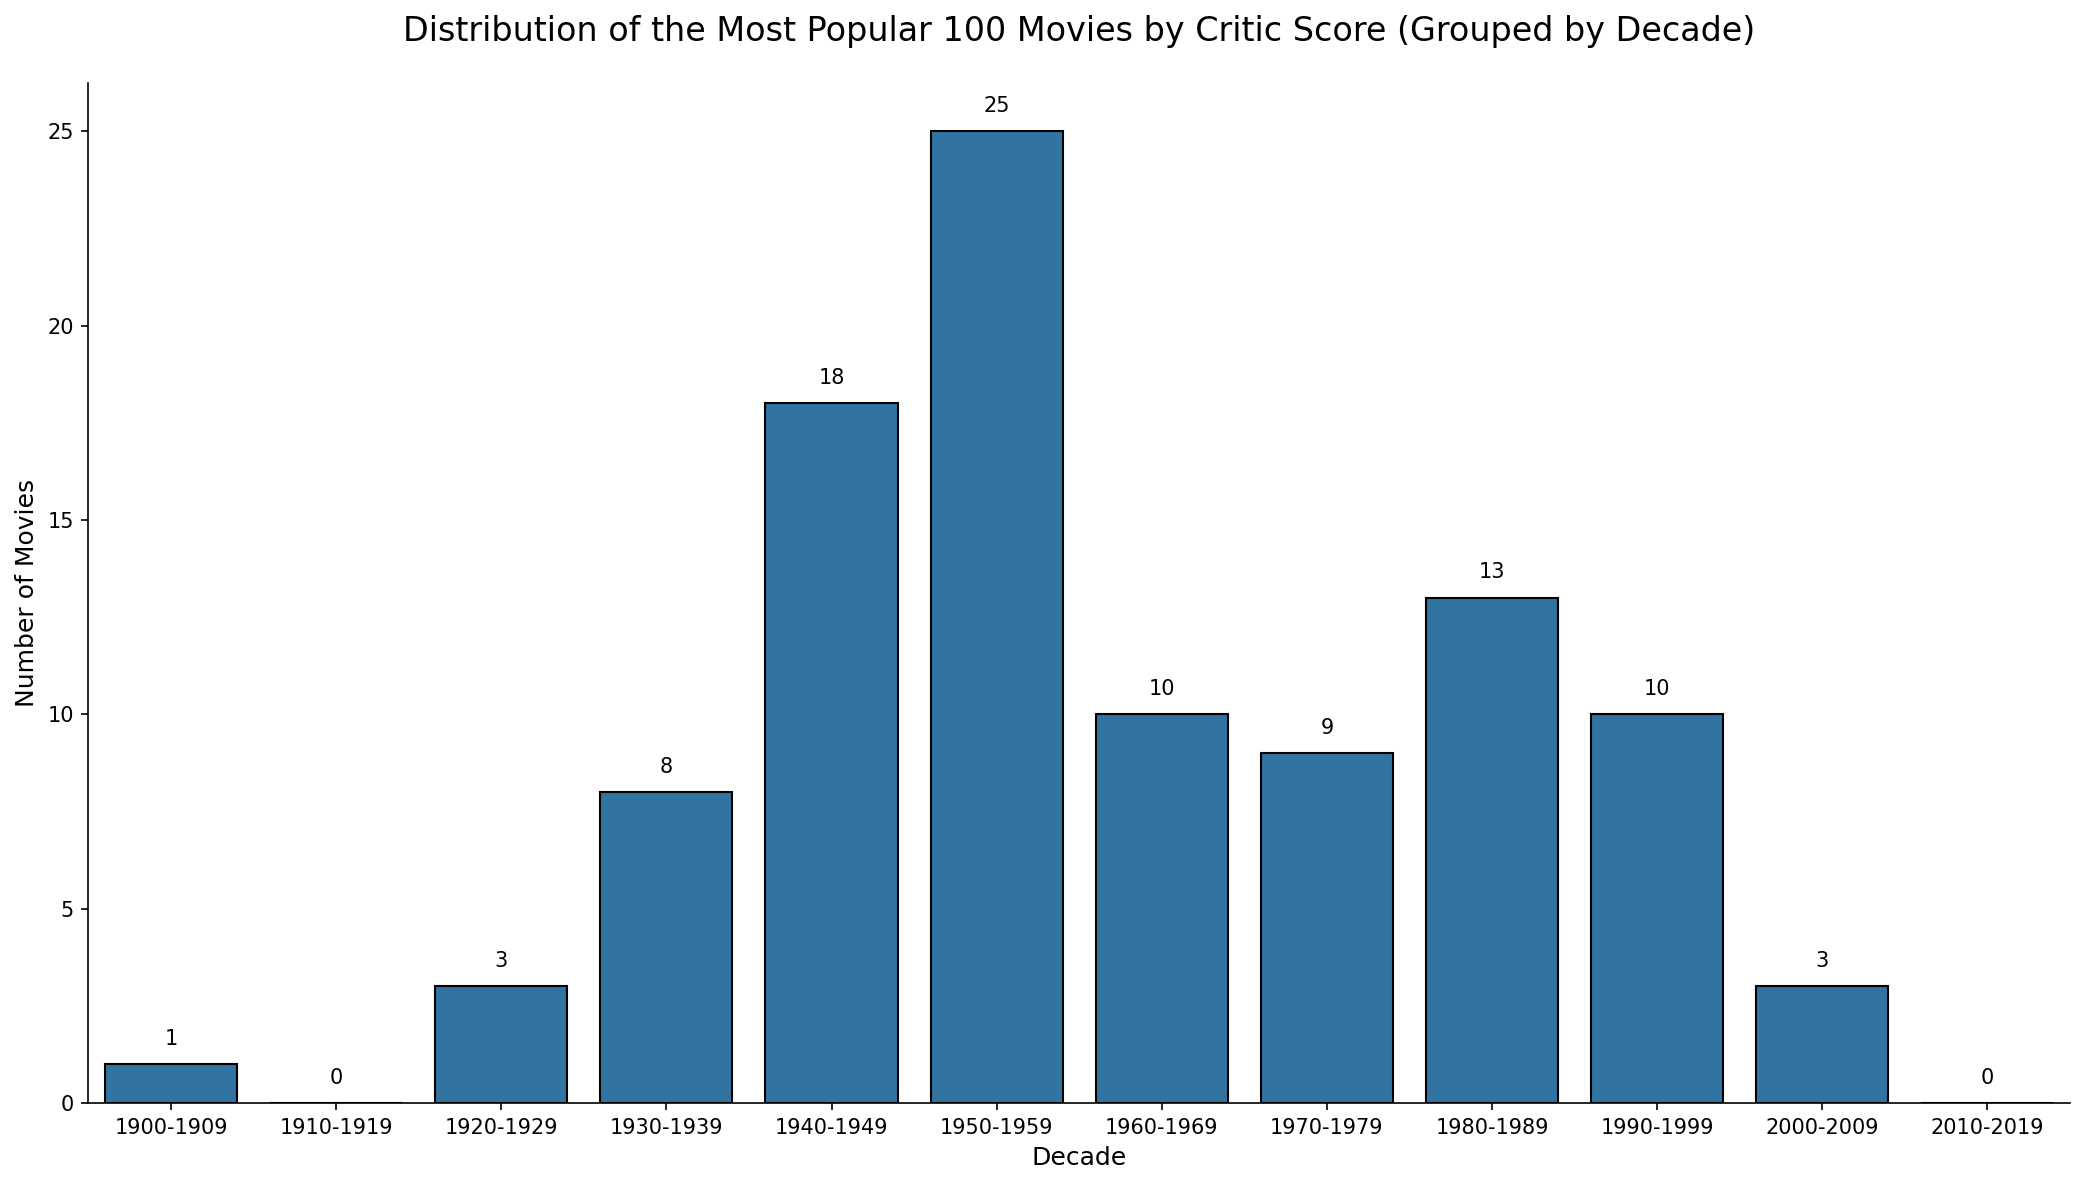

In [12]:
# Sort the movies based on critic score and movie year, and get the top 100
top_100_movies = movies_cleaned.sort_values(by=['critic_score', 'movie_year'], ascending=[False, True]).head(100)

# Define 10-year bins and create a new column to group movie years by decade
bins = range(1900, 2030, 10)  # 10-year bins
labels = [f'{b}-{b+9}' for b in bins[:-1]]  # Create labels for the bins

# Create a new column 'decade' in top_100_movies to categorize movies into 10-year intervals
top_100_movies['decade'] = pd.cut(top_100_movies['movie_year'], bins=bins, labels=labels, right=False)

# Count the number of movies in each decade
decade_counts = top_100_movies['decade'].value_counts().sort_index()

# Set global parameters for text anti-aliasing and sharpness
plt.rcParams['text.antialiased'] = True
plt.rcParams['figure.dpi'] = 150  # Increase DPI for better text sharpness

# Set up the figure with high DPI for sharper text
plt.figure(figsize=(14, 8))  # Increased figure size for better display

# Plot a bar plot with Seaborn for separated bars
ax = sns.barplot(x=decade_counts.index, y=decade_counts.values, edgecolor='black', color='#1f77b4')  # Original blue color

# Set titles and labels with anti-aliasing enabled by default, add pad to title for spacing
plt.title('Distribution of the Most Popular 100 Movies by Critic Score (Grouped by Decade)', fontsize=16, pad=20)  # Adjust the pad value for distance
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

# Remove the top spine (frame line above the plot)
ax.spines['top'].set_visible(False)
ax.spines["right"].set_visible(False)

# Add numbers above each bar
for index, value in enumerate(decade_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

# Adjust the layout for better presentation
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
# Get the top 100 most popular movies based on critic_score
top_100_movies_critic_score = movies_cleaned.nlargest(100, 'critic_score')

# Create year bins/intervals for every 10 years (including "1910-1919")
bins = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
labels = ['1900-1909', '1910-1919', '1920-1929', '1930-1939', '1940-1949', '1950-1959',
          '1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2019']

# Bin the movie years into intervals, even if a bin is empty
top_100_movies_critic_score['year_interval'] = pd.cut(top_100_movies_critic_score['movie_year'], bins=bins, labels=labels, right=False)

# Create a new DataFrame to consolidate movie titles by year interval, sorted by year
hover_data = top_100_movies_critic_score.groupby('year_interval', observed=False).apply(
    lambda x: '<br>• '.join(sorted([f"{title} ({year})" for title, year in zip(x['movie_title'], x['movie_year'])], key=lambda y: int(y.split('(')[-1][:-1])))).reset_index(name='movie_title_list')

# Ensure the first movie title in each hover starts with a bullet point
hover_data['movie_title_list'] = '• ' + hover_data['movie_title_list']

# Merge back to include movie titles in the main DataFrame
top_100_movies_critic_score = top_100_movies_critic_score.merge(hover_data, on='year_interval', suffixes=('', '_list'), how='right')

# Create the bar plot
fig = px.bar(
    top_100_movies_critic_score,
    x='year_interval',
    y='critic_score',  # This is just a dummy to create the bars, it doesn't matter
    color_discrete_sequence=['green'],
    hover_name='year_interval',
    hover_data={'movie_title_list': True},  # Show the list of movie titles on hover
    title='Top 100 Movies by Critic Score (Interactive Graph)',
    labels={'year_interval': 'Year Interval', 'critic_score': 'Movies Count'}
)

# Customize hover to show movie titles and other desired info
fig.update_traces(hovertemplate='Movies with best critic score (from past to present):<br><br>%{customdata[0]}')

# Remove y-axis labels since they aren't meaningful here
fig.update_layout(yaxis_title='', yaxis=dict(showticklabels=False))

# Center the title and add the message below it with a small distance from the graph
fig.update_layout(
    title_x=0.5,  # Center the title
    annotations=[
        dict(
            text="All these movies have been rated 100 by the critic. The graph shows these movies grouped by decade.<br>Go with the mouse on a bar to see the list of movies.",
            xref="paper", yref="paper",
            x=0.5, y=1.1,  # Slightly increased 'y' to add space between text and graph
            showarrow=False,
            font=dict(size=12),  # Increased font size
            align="center"
        )
    ],
    xaxis=dict(tickfont=dict(size=10))  # Adjust the font size of x-axis labels (decades)
)

# Show the plot
fig.show()

### 4.3. Top 100 movies by "combined critic & audience score"

In [14]:
# Calculate the combined score as the average of critic_score and audience_score
movies_cleaned['combined_score'] = (movies_cleaned['critic_score'] + movies_cleaned['audience_score']) / 2

# Get the top 100 movies based on the combined score
top_100_combined_score = movies_cleaned.nlargest(100, 'combined_score')

# Create a new DataFrame to consolidate movie titles by combined score
hover_data = top_100_combined_score.groupby('combined_score').apply(
    lambda x: '<br>• '.join(sorted([f"{title} ({year})" for title, year in zip(x['movie_title'], x['movie_year'])], key=lambda y: int(y.split('(')[-1][:-1])))
).reset_index(name='movie_title_list')

# Merge back to include movie titles in the main DataFrame
top_100_combined_score = top_100_combined_score.merge(hover_data, on='combined_score')

# Create the scatter plot
fig = px.scatter(
    top_100_combined_score,
    x='combined_score',
    y='combined_score',  # Dummy y-value for the dots
    hover_name='combined_score',
    hover_data={'movie_title_list': True},  # Show the list of movie titles
    title='Top 100 Movies by Combined Critic and Audience Score (interactive graph)',
    size='combined_score',  # Size based on the combined score
    size_max=20,  # Adjust the size of the dots
)

# Update hover template to show bullet points with a line break
fig.update_traces(hovertemplate='Movie titles (from past to present):<br><br>• %{customdata[0]}')

# Center the title
fig.update_layout(title_x=0.5)

# Remove Y-axis as it is not meaningful
fig.update_layout(yaxis_title='', yaxis=dict(showticklabels=False))

# Show the plot
fig.show()

## 5. Data Science Methods
In this chapter, we delve into the application of two widely recognized and powerful data science methodologies: Multiple Linear Regression and Natural Language Processing (NLP). These techniques have been instrumental in extracting deeper insights from the datasets of the project.

## 5.1. Multiple Linear Regression
Multiple Linear Regression is a statistical approach used to model the relationship between multiple independent variables and a dependent variable. This method enables the identification and quantification of the influence of various factors on a particular outcome, thereby providing valuable insights into the underlying patterns within the data. By employing Multiple Linear Regression, significant relationships can be uncovered that enhance the understanding of trends and predictions in the movie industry.
<br/>
<br/>
For the development of the linear regression model, only variables from the "movies" dataset were utilized. To facilitate this process, a copy of the "movies_cleaned" DataFrame was created, ensuring that the original data remained intact while allowing for the necessary analyses to be conducted. Variables from the "critic reviews" and "user reviews" datasets were excluded from this analysis.

In [15]:
# create a copy of the movies_cleaned dataset
movies_cleaned2 = movies_cleaned.copy()

For our model we will use the following variables:
- "audience_score" as dependent variable;
- "rating","runtime_in_minutes" and "original_language" as independent variables. Before building the linear regression model the following variables need some adjustments:

- rating

- runtime_in_minutes

- original_language

For example, the variable "rating" has 2475 "Unknown" values. For simplicity we drop the rows with this rating value:

In [16]:
# Let's find out how many rows of the column Rating have Unknown in them
unknown_count = movies_cleaned2[movies_cleaned2['rating'] == 'unknown'].shape[0]

print(f'Number of rows with "unknown" rating: {unknown_count}')

Number of rows with "unknown" rating: 0


In [17]:
# Remove rows where the 'rating' column contains the string 'Unknown' in movies_cleaned2 dataset
movies_cleaned2 = movies_cleaned2[movies_cleaned2['rating'] != 'unknown']
print(f'Number of rows with "unknown" rating: {unknown_count}')

Number of rows with "unknown" rating: 0


Now let's focus on the "runtime_in_minutes" column, which has some irrelevant values too:

In [18]:
# Find out how many rows of the column runtime_in_minutes is missing or non-numerical

missing_count = movies_cleaned2['runtime_in_minutes'].isna().sum()

# Count rows where 'runtime_in_minutes' is non-numerical
non_numeric_count = pd.to_numeric(movies_cleaned2['runtime_in_minutes'], errors='coerce').isna().sum()

# Exclude the NaN values from the non-numerical count (if they're already counted as missing)
non_numeric_only = non_numeric_count - missing_count

print(f'Number of missing (NaN) values in "runtime_in_minutes": {missing_count}')
print(f'Number of non-numerical values in "runtime_in_minutes": {non_numeric_only}')

Number of missing (NaN) values in "runtime_in_minutes": 17
Number of non-numerical values in "runtime_in_minutes": 0


Let's print the movie_titles with missing runtime_in_minutes:


In [19]:

# Filter rows where 'runtime_in_minutes' is missing (NaN)
missing_runtime_movies_cleaned2 = movies_cleaned2[movies_cleaned2['runtime_in_minutes'].isna()]

# Select and display relevant columns: movie_title, movie_year, runtime_in_minutes
missing_runtime_info = missing_runtime_movies_cleaned2[['movie_title', 'movie_year', 'runtime_in_minutes']]

# Show the rows with missing runtime information
print(missing_runtime_info)

                                             movie_title  movie_year  \
7244                                          Article 15        2019   
7304                         Escape Plan: The Extractors        2019   
7714   The Godfather, Coda: The Death of Michael Corl...        2020   
7800               American Murder: The Family Next Door        2020   
7895                                            Monstrum        2020   
8031                         Batman: Death in the Family        2020   
8185                                          Nightbooks        2021   
8213                               No One Gets Out Alive        2021   
8684                                     The Redeem Team        2022   
8697                                       Good Mourning        2022   
9014                                    This Place Rules        2022   
9200                                               Quasi        2023   
9599                                Trolls Band Together        

Next is to fill this missing runtime_in_minutes with accurate values:





In [20]:
# We will create a dictionary with movie titles, years, and their correct runtimes
runtime_updates = {

    ('Quasi', 2023): 100
}

# Update the runtime_in_minutes column
for (title, year), runtime in runtime_updates.items():
    movies_cleaned2.loc[(movies_cleaned2['movie_title'] == title) & (movies_cleaned2['movie_year'] == year), 'runtime_in_minutes'] = runtime

movies_cleaned2_relevant = movies_cleaned2[['movie_title', 'movie_year', 'runtime_in_minutes']]

# Verify the changes
print(movies_cleaned2_relevant[movies_cleaned2_relevant['runtime_in_minutes'].isna() == False].loc[movies_cleaned2['movie_title'].isin([title for title, year in runtime_updates])])

     movie_title  movie_year  runtime_in_minutes
9200       Quasi        2023               100.0


Now we will fix the data in the column "original_language" by inserting the missing language for the rows with missing or "Unknown" value:

In [21]:
# Check for missing and "Unknown" values in the 'original_language' column
missing_values = movies_cleaned2['original_language'].isnull().sum()

# To find out how many rows of the column original_language have Unknown in them
unknown_count = movies_cleaned2[movies_cleaned2['original_language'] == 'Unknown'].shape[0]


print(f"Number of missing values in 'original_language': {missing_values}")
print(f"Number of rows with 'Unknown' in 'original_language': {unknown_count}")

Number of missing values in 'original_language': 0
Number of rows with 'Unknown' in 'original_language': 23


In [22]:
# Obtain list of movies where 'original_language' is 'Unknown'
unknown_languages = movies_cleaned2[movies_cleaned2['original_language'] == 'Unknown']

# Extract the list of movie titles where original_language is 'Unknown'
movie_titles_with_unknown_language = unknown_languages[['movie_title','original_language']].values.tolist()

# Output the list
movie_titles_with_unknown_language

[['The Birth of a Nation', 'Unknown'],
 ['The Passion of Joan of Arc', 'Unknown'],
 ["Pandora's Box", 'Unknown'],
 ['City Lights', 'Unknown'],
 ['Baraka', 'Unknown'],
 ['Apocalypto', 'Unknown'],
 ['The Artist', 'Unknown'],
 ['Bo Burnham: Make Happy', 'Unknown'],
 ['Munyurangabo', 'Unknown'],
 ['Tell It to the Marines', 'Unknown'],
 ['The Red Turtle', 'Unknown'],
 ['Adam Sandler: 100% Fresh', 'Unknown'],
 ['Hannah Gadsby: Nanette', 'Unknown'],
 ['Maharshi', 'Unknown'],
 ['Escape Plan: The Extractors', 'Unknown'],
 ["Midsommar: The Director's Cut", 'Unknown'],
 ['Dave Chappelle: Sticks & Stones', 'Unknown'],
 ['Monstrum', 'Unknown'],
 ['The Witch: Part 1 - The Subversion', 'Unknown'],
 ['Tales from the Apocalypse', 'Unknown'],
 ['Silver and the Book of Dreams', 'Unknown'],
 ['Mavka: The Forest Song', 'Unknown'],
 ['Out of Darkness', 'Unknown']]

In [23]:
# Dictionary mapping movie titles to their original languages

language_mapping = {
    "Adam Sandler: 100% Fresh": "English",
    "Apocalypto": "Yucatec Maya",
    "Bo Burnham: Make Happy": "English",
    "City Lights": "Nonverbal",
    "Hannah Gadsby: Nanette": "English",
    "Out of Darkness": "Tola",  # Fictitious language
    "The Artist": "French",
    "The Red Turtle": "Nonverbal"
}



# Update the original_language column based on the mapping
movies_cleaned2['original_language'] = movies_cleaned2['movie_title'].map(language_mapping).fillna(movies_cleaned2['original_language'])

# Check for missing values in the 'original_language' column
missing_values = movies_cleaned2['original_language'].isnull().sum()

# To find out how many rows of the column original_language have Unknown in them
unknown_count = movies_cleaned2[movies_cleaned2['original_language'] == 'Unknown'].shape[0]


print(f"Number of missing values in 'original_language': {missing_values}")
print(f"Number of rows with 'Unknown' in 'original_language': {unknown_count}")
print("'original_language' column is filled.")

Number of missing values in 'original_language': 0
Number of rows with 'Unknown' in 'original_language': 15
'original_language' column is filled.


Our next step is to convert any columns of our interest that contain strings into categories. Once we can do that, we can apply one-hot encoding to convert categorical data into a numeric format that can be used for our regression model

In [24]:
# Which columns contain strings?
# These columns contain strings
for label, content in movies_cleaned2.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

movie_id
movie_title
critic_sentiment
audience_sentiment
rating
original_language


In [25]:
# List of columns that need to be converted to category dtype for our regression model
columns_to_convert = ['rating', 'original_language']

# Loop through the dataframe columns
for label, content in movies_cleaned2.items():
    if label in columns_to_convert and pd.api.types.is_string_dtype(content):
        movies_cleaned2[label] = content.astype("category").cat.as_ordered()

# Verify the change
print(movies_cleaned2.dtypes)

movie_id                    object
movie_year                   int64
movie_title                 object
critic_score               float64
critic_sentiment            object
audience_score             float64
audience_sentiment          object
rating                    category
original_language         category
release_year_theaters      float64
release_year_streaming       int64
runtime_in_minutes         float64
combined_score             float64
dtype: object


### 5.1.1. Defining the baseline variables before applying the "one-hot encoding" method

In [26]:
# Check the frequency of each category in the 'rating' column
rating_counts = movies_cleaned2['rating'].value_counts()

# Print the most common rating
most_common_rating = rating_counts.idxmax()

print(f"The most common rating is: {most_common_rating}")

The most common rating is: R


So R rating will be our baseline to compare every category in rating with

In [27]:
# Check the frequency of each category in the 'original_language' column
original_language_counts = movies_cleaned2['original_language'].value_counts()

# Print the most common rating
most_common_original_language = original_language_counts.idxmax()

print(f"The most common original_language is: {most_common_original_language}")

The most common original_language is: English


So English will be our baseline to compare every category in original_language with

In [28]:
# Do we need to normalize runtime_in_minutes?
movies_cleaned2['runtime_in_minutes'].describe()

count    10217.000000
mean       106.174905
std         20.221823
min         12.000000
25%         93.000000
50%        103.000000
75%        116.000000
max        317.000000
Name: runtime_in_minutes, dtype: float64

### 5.1.2. Normalization of "runtime_in_minutes"

The runtime_in_minutes distribution gives important insights into the data:

Count (7758): This shows that there are 7758 movies in the dataset with a recorded runtime, which is a decent sample size.

Mean (104): The average runtime is around 104 minutes. This suggests that most movies in the dataset are approximately 1 hour and 46 minutes long.

Standard Deviation (19.14): The standard deviation of 19.14 minutes tells us that the runtimes vary moderately around the mean. Most movies will likely have runtimes between 85 minutes and 123 minutes (mean ± 1 standard deviation).

Minimum (12.0): The shortest movie is only 12 minutes long, which is likely a short film or some form of special content.

Quartiles (25th percentile: 94, 50th percentile (median): 104, 75th percentile: 117):

25th percentile (94 minutes): 25% of the movies are shorter than 94 minutes.
Median (104 minutes): 50% of the movies are shorter than 104 minutes.
75th percentile (116 minutes): 75% of the movies are shorter than 117 minutes.
The interquartile range (IQR), which measures the middle 50% of runtimes, is 23 minutes (116 - 94). This indicates a fairly narrow range for most movies, implying that many movies fall between 94 and 117 minutes long.

Maximum (254 minutes): The longest movie in the dataset is 254 minutes (over 4 hours long), which is an extreme outlier.

Key Observations:
Outliers: The minimum (12 minutes) and maximum (254 minutes) suggest there are outliers in your dataset, especially at the higher end.
Distribution Shape: Given the quartiles and the mean, the runtime distribution seems slightly right-skewed (positively skewed), meaning there are some very long movies pushing the average higher than the median.
Need for Normalization: Since the range is from 12 to 254 minutes, and the standard deviation is relatively high compared to the mean, normalizing the runtime could be helpful to reduce the influence of extreme values on your linear regression model.

In [29]:
# so we will proceed to normalizing the runtime_in_minutes using min-max scaling to reduce the impact of outliers
from sklearn.preprocessing import MinMaxScaler

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Select the column to be normalized
movies_cleaned2['runtime_normalized'] = scaler.fit_transform(movies_cleaned2[['runtime_in_minutes']])

# drop the null values in the column "runtime_normalized"
movies_cleaned2 = movies_cleaned2.dropna(subset=['runtime_normalized'])

# Display a sample of the normalized data
print(movies_cleaned2[['runtime_in_minutes', 'runtime_normalized']].head())

   runtime_in_minutes  runtime_normalized
0                14.0            0.006557
1               190.0            0.583607
2                69.0            0.186885
3                60.0            0.157377
4                65.0            0.173770


### 5.1.3. Should we normalize the dependent variable "audience_score"?

In [30]:
movies_cleaned2['audience_score'].describe()


count    10217.000000
mean        64.346638
std         20.756292
min          0.000000
25%         49.000000
50%         67.000000
75%         82.000000
max        100.000000
Name: audience_score, dtype: float64

<Axes: >

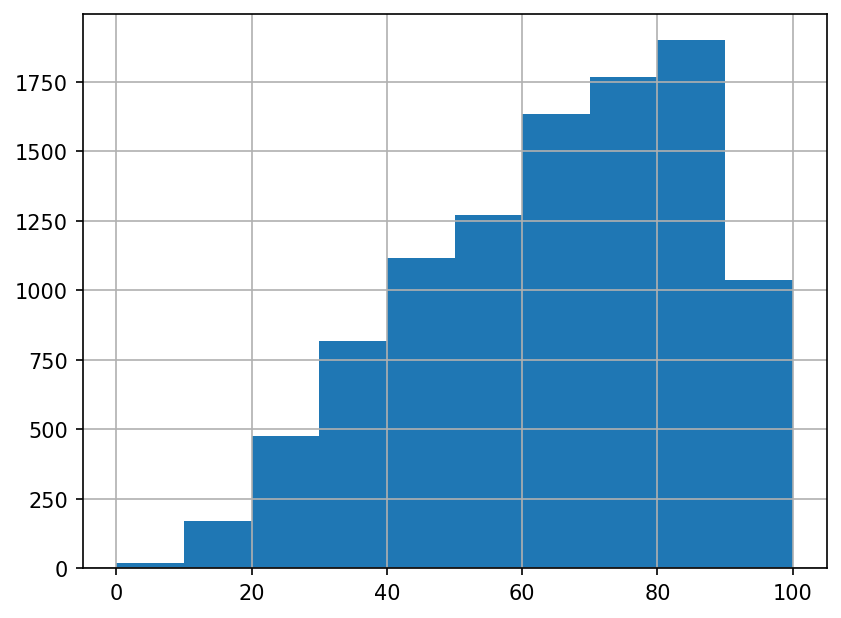

In [31]:
movies_cleaned2['audience_score'].hist()

Looking at the summary statistics for audience_score:

Count: 7,758 movies have non-missing audience_score.
Mean: The average score is about 63.49.
Std: The standard deviation is 20.30, indicating a moderate spread around the mean.
Min and Max: The minimum score is 0, and the maximum is 100, covering the full range of possible audience scores.
Quartiles:
25% of movies have an audience score of 48 or below.
50% (median) have a score of 66 or below.
75% of movies have a score of 80 or below.
Key Points:
The audience score distribution is not extremely skewed, as the mean and median are relatively close (63.49 vs. 66), suggesting that the data is reasonably centered around the middle.
The range from 0 to 100 and the standard deviation indicate variance but not extreme outliers.
Should We Normalize audience_score?
Given that the scores are within a standard range (0–100) and show no extreme skew or outliers, normalization is likely not necessary. The distribution is fairly even, so leaving it in its raw form will keep our model predictions in a more interpretable range.

### 5.1.4. One-hot encoding for the variabless "rating" and "original_language"

In [32]:
movies_cleaned2.columns

Index(['movie_id', 'movie_year', 'movie_title', 'critic_score',
       'critic_sentiment', 'audience_score', 'audience_sentiment', 'rating',
       'original_language', 'release_year_theaters', 'release_year_streaming',
       'runtime_in_minutes', 'combined_score', 'runtime_normalized'],
      dtype='object')

In [33]:
# Step 1: Exclude unnecessary columns
exclude_cols = ['movie_id', 'movie_year', 'movie_title', 'critic_score', 'critic_sentiment',
                'audience_sentiment', 'release_year_theaters', 'release_year_streaming',
                'runtime_in_minutes', 'combined_score']

# Step 2: One-hot encode categorical variables and exclude columns not being used
movies_encoded = pd.get_dummies(movies_cleaned2.drop(columns=exclude_cols + ['audience_score']),
                                columns=['rating', 'original_language'], drop_first=False)

# Manually drop 'rating_R' and 'original_language_English' to set them as the baseline
movies_encoded = movies_encoded.drop(['rating_R', 'original_language_English'], axis=1)

movies_encoded.head(50).T

# Add 'runtime_normalized' to the dataset (it's already part of the dataframe, so no need to add it again)


0         1         2         3   \
runtime_normalized                  0.006557  0.583607  0.186885  0.157377   
rating_G                               False     False     False     False   
rating_NC-17                           False     False     False     False   
rating_PG                              False     False     False     False   
rating_PG-13                           False     False     False     False   
rating_TV                              False     False     False     False   
rating_TV-14                           False     False     False     False   
rating_Unknown                          True      True      True      True   
original_language_Afrikaans            False     False     False     False   
original_language_Albanian             False     False     False     False   
original_language_Arabic               False     False     False     False   
original_language_Aramaic              False     False     False     False   
original_language_Bangla               False     False     False     False   
original_language_Basque               False     False     False     False   
original_language_Belarusian           False     False     False     False   
original_language_Bosnian              False     False     False     False   
original_language_Catalan              False     False     False     False   
original_language_Chinese              False     False     False     False   
original_language_Czech                False     False     False     False   
original_language_Danish               False     False     False     False   
original_language_Dutch                False     False     False     False   
original_language_Estonian             False     False     False     False   
original_language_European Spanish     False     False     False     False   
original_language_Filipino             False     False     False     False   
original_language_Finnish              False     False     False     False   
original_language_French                True     False     False     False   
original_language_Georgian             False     False     False     False   
original_language_German               False     False      True     False   
original_language_Greek                False     False     False     False   
original_language_Hebrew               False     False     False     False   
original_language_Hindi                False     False     False     False   
original_language_Hungarian            False     False     False     False   
original_language_Icelandic            False     False     False     False   
original_language_Indonesian           False     False     False     False   
original_language_Inuktitut            False     False     False     False   
original_language_Italian              False     False     False     False   
original_language_Japanese             False     False     False     False   
original_language_Kalaallisut          False     False     False     False   
original_language_Kannada              False     False     False     False   
original_language_Khmer                False     False     False     False   
original_language_Korean               False     False     False     False   
original_language_Lao                  False     False     False     False   
original_language_Macedonian           False     False     False     False   
original_language_Malay                False     False     False     False   
original_language_Malayalam            False     False     False     False   
original_language_Mongolian            False     False     False     False   
original_language_Nonverbal            False     False     False     False   
original_language_Norwegian            False     False     False     False   
original_language_Persian              False     False     False     False   
original_language_Polish               False     False     False     False   
original_language_Portuguese           False     False     False

In [34]:

# Look at a specific row before and after encoding
print(movies_cleaned2[['rating', 'original_language']].iloc[10])  # Original categorical values for row 10
print(movies_encoded.iloc[10])  # One-hot encoded values for row 10

rating               Unknown
original_language    Unknown
Name: 10, dtype: object
runtime_normalized                    0.213115
rating_G                                 False
rating_NC-17                             False
rating_PG                                False
rating_PG-13                             False
rating_TV                                False
rating_TV-14                             False
rating_Unknown                            True
original_language_Afrikaans              False
original_language_Albanian               False
original_language_Arabic                 False
original_language_Aramaic                False
original_language_Bangla                 False
original_language_Basque                 False
original_language_Belarusian             False
original_language_Bosnian                False
original_language_Catalan                False
original_language_Chinese                False
original_language_Czech                  False
original_language_Danish 

In [35]:
# Checking rows where the rating is PG (non-baseline)
print(movies_cleaned2[movies_cleaned2['rating'] == 'PG'][['rating', 'original_language']].iloc[0])
print(movies_encoded[movies_cleaned2['rating'] == 'PG'].iloc[0])

rating                    PG
original_language    English
Name: 16, dtype: object
runtime_normalized                    0.265574
rating_G                                 False
rating_NC-17                             False
rating_PG                                 True
rating_PG-13                             False
rating_TV                                False
rating_TV-14                             False
rating_Unknown                           False
original_language_Afrikaans              False
original_language_Albanian               False
original_language_Arabic                 False
original_language_Aramaic                False
original_language_Bangla                 False
original_language_Basque                 False
original_language_Belarusian             False
original_language_Bosnian                False
original_language_Catalan                False
original_language_Chinese                False
original_language_Czech                  False
original_language_Danish 

In [36]:
# Checking rows where the original language is French (non-baseline)
print(movies_cleaned2[movies_cleaned2['original_language'] == 'French'][['rating', 'original_language']].iloc[0])
print(movies_encoded[movies_cleaned2['original_language'] == 'French'].iloc[0])

rating               Unknown
original_language     French
Name: 0, dtype: object
runtime_normalized                    0.006557
rating_G                                 False
rating_NC-17                             False
rating_PG                                False
rating_PG-13                             False
rating_TV                                False
rating_TV-14                             False
rating_Unknown                            True
original_language_Afrikaans              False
original_language_Albanian               False
original_language_Arabic                 False
original_language_Aramaic                False
original_language_Bangla                 False
original_language_Basque                 False
original_language_Belarusian             False
original_language_Bosnian                False
original_language_Catalan                False
original_language_Chinese                False
original_language_Czech                  False
original_language_Danish  

### 5.1.5. Building the Linear Regression Model

In [37]:
# Add 'runtime_normalized' to the dataset (it's already part of the dataframe, so no need to add it again)

# Step 3: Define X (Predictors) and y (Target)
X = movies_encoded[['runtime_normalized'] + [col for col in movies_encoded.columns if 'rating_' in col or 'original_language_' in col]]
y = movies_cleaned2['audience_score']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

# To find out the influence of each variable, check the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 1.3055604219192443e+25
R-squared: -2.9615455986363807e+22
                                     Coefficient
runtime_normalized                  8.695946e+01
rating_G                            1.124826e+01
rating_NC-17                       -2.009639e+00
rating_PG                           5.478009e+00
rating_PG-13                        5.805534e-01
rating_TV                           3.497762e+00
rating_TV-14                       -6.212397e+00
rating_Unknown                      5.099218e+00
original_language_Afrikaans        -1.633574e+14
original_language_Albanian          2.287989e+01
original_language_Arabic            1.013481e+01
original_language_Aramaic           1.310595e+01
original_language_Bangla            2.097344e+01
original_language_Basque            6.964534e+00
original_language_Belarusian        1.948525e+01
original_language_Bosnian           2.480781e+01
original_language_Catalan           1.996506e+01
original_language_Chinese           8.84

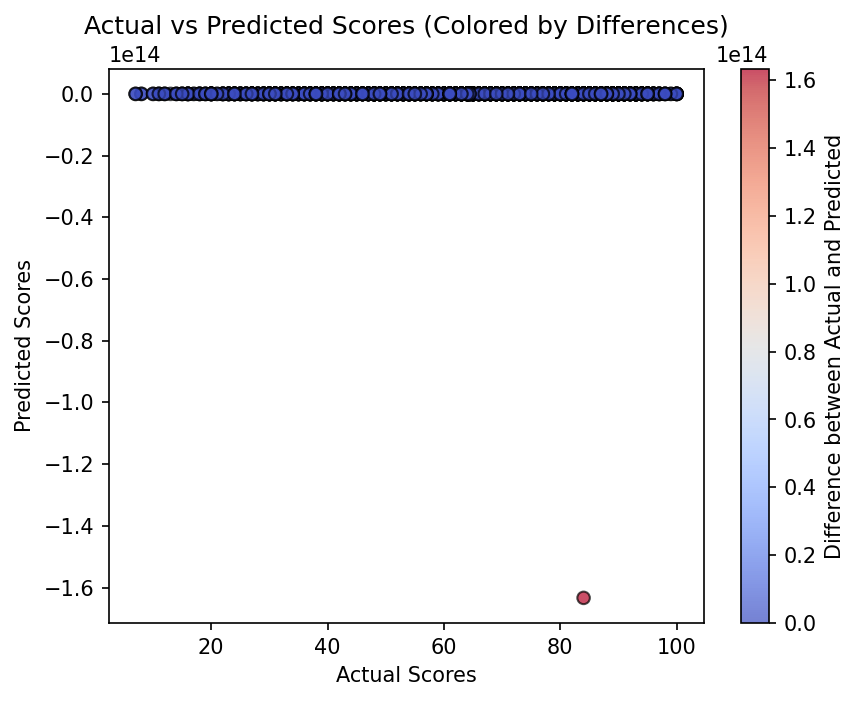

In [38]:
# Calculate the difference between actual and predicted values
differences = np.abs(y_test - y_pred)

# Create a scatter plot with a color gradient based on the differences
plt.scatter(y_test, y_pred, c=differences, cmap='coolwarm', edgecolor='k', alpha=0.7)

# Add a color bar to show the scale of differences
plt.colorbar(label='Difference between Actual and Predicted')

# Add labels and title
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Scores (Colored by Differences)')
plt.show()

### 5.1.6. Results

A break down of the results of our linear regression model:

1. Mean Squared Error (MSE):
MSE = 1,17
This measures the average squared difference between the actual audience_score values and the predicted values from your model. A lower MSE indicates better performance.
In our case, 366.09 indicates that the model’s predictions differ from the actual audience_score by a decent amount on average. This suggests our model is not highly accurate, even though some error is expected.
2. R-squared (R²):
R² = -2.7
The R² explains how well our model accounts for variance in the target variable (audience_score).
This R² is quite low, indicating that the factors we included in the model (runtime, rating, original language) are not capturing most of the variation in audience scores. There might be other important features missing or the relationships between the variables may not be well captured by a linear model.
3. Coefficients of the Features:
The coefficients indicate the influence of each predictor on the target variable, audience_score. A positive coefficient suggests a positive relationship, while a negative coefficient suggests the opposite.

Next, we will interpret some of the key features:

Runtime (normalized):

Coefficient: 7.90
For each unit increase in the normalized runtime, the audience score is expected to increase by around 7.9 points, assuming all other variables remain constant. Runtime has a strong positive impact on audience score.

Rating:

G: 11.24
Movies rated "G" are expected to have an audience score that is 11.24 points higher than movies rated "R" (your baseline category), all else equal.
NC-17: -7.11
Movies rated "NC-17" tend to have audience scores that are about 7.11 points lower than "R"-rated movies.
PG: 6.87, PG-13: 0.51, TV: 5.71, TV-14: -4.55
Each of these categories' coefficients indicate how much higher or lower they predict audience score compared to the baseline rating (R).
Original Language:

Afrikaans: 15.75, Arabic: 11.24, Chinese: 13.40, Danish: 22.23, French: 19.11, Finnish: 32.17, etc.
These coefficients tell how the movie's original language influences the audience score relative to the baseline (English). For example:
Movies in Danish are expected to have audience scores about 22.23 points higher than English-language movies.
Movies in French would score about 19.11 points higher, while Finnish-language movies would score about 32.17 points higher.
Negative coefficients (like for Hindi: -3.75, Norwegian: -4.36) suggest those languages might lower the predicted audience score compared to English.
Key Insights:
Runtime is positively correlated with audience score, meaning longer movies tend to have higher audience scores.
Rating has a clear influence on audience score, with "G" and "PG" rated movies generally receiving better scores than "R", and "NC-17" movies being scored lower than "R".
Original Language also has an impact, with some languages (like Danish, French, and Finnish) positively influencing the audience score, while others (like Hindi, Norwegian) have a small negative impact.
Next Steps to Improve the Model:
Include more relevant features (e.g., critic_score, audience_sentiment, critic_sentiment, director, actor). Some of these features may have to come from other datasets found online.

## 5.2. Natural Language Processing
Natural Language Processing (NLP) is a branch of artificial intelligence that enables computers to understand, interpret, and generate human language. Through the implementation of NLP techniques, we can analyze textual data—such as movie reviews—transforming unstructured information into actionable insights. This allows us to assess sentiment, extract themes, and gauge audience reactions, enhancing our overall understanding of viewer perceptions and preferences.

### 5.2.1. Cleaning Quotes and Filtering Nouns and Verbs
The first step in our analysis involved cleaning the movie review quotes. We used the process_quotes() function to remove stop words, which are common but uninformative words such as "the," "is," and "and." Additionally, we defined a list of words to exclude, such as general movie-related terms (e.g., "movie," "film") and quality descriptors (e.g., "good," "bad"). By removing these words, we focused the analysis on those words that provide deeper insight into the content and themes of the reviews.

After cleaning, we filtered each cleaned quote to retain only nouns and verbs. This was done using part-of-speech tagging to identify words representing core ideas or actions. This allowed us to focus specifically on key themes, such as "love," "war," or "acting," and highlight the main concepts expressed in the reviews while eliminating less important parts of speech.

In [39]:
# Download necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('stopwords', quiet=True)

# Define stop words and words to exclude
stop_words = set(stopwords.words('english'))
words_to_exclude = {
    # General movie-related terms
    'movie', 'film', 'cinema', 'picture', 'flick', 'screening', 'showing',

    # Quality descriptors
    'good', 'bad', 'great', 'terrible', 'excellent', 'poor', 'amazing', 'awful',
    'wonderful', 'horrible', 'best', 'worst', 'favorite', 'liked', 'disliked',

    # Cinema-related terms
    'actor', 'actress', 'director', 'producer', 'screenplay', 'script', 'scene',
    'character', 'plot', 'story', 'dialogue', 'cinematography', 'soundtrack',

    # General descriptors
    'interesting', 'boring', 'exciting', 'dull', 'entertaining', 'disappointing',
    'impressive', 'mediocre', 'overrated', 'underrated',

    # Time-related terms
    'hour', 'minute', 'long', 'short',

    # Viewing experience
    'watch', 'saw', 'seen', 'theater', 'cinema', 'home',

    # Rating-related terms
    'star', 'rating', 'review', 'critic', 'audience',

    # Production-related terms
    'budget', 'box office', 'sequel', 'remake', 'adaptation',

    # General opinion words
    'think', 'thought', 'feel', 'felt', 'believe', 'opinion'
}
stop_words.update(words_to_exclude)

def process_quote(quote):
    # Convert to string if it's a list
    if isinstance(quote, list):
        quote = ' '.join(quote)
    else:
        quote = str(quote)

    # Tokenize and remove stop words and excluded words
    tokens = word_tokenize(quote.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    # Perform POS tagging
    tagged = pos_tag(tokens)

    # Filter for nouns and verbs
    filtered = [word for word, pos in tagged if pos.startswith('N') or pos.startswith('V')]

    return ' '.join(filtered)

def process_quotes_in_chunks(df, chunk_size=1000):
    processed_chunks = []
    total_chunks = len(df) // chunk_size + (1 if len(df) % chunk_size != 0 else 0)

    for i in tqdm(range(0, len(df), chunk_size), total=total_chunks, desc="Processing chunks"):
        try:
            chunk = df.iloc[i:i+chunk_size].copy()
            chunk['filtered_quotes'] = chunk['all_quotes'].apply(process_quote)
            processed_chunks.append(chunk)
            print(f"Processed chunk {i//chunk_size + 1}/{total_chunks}")
        except Exception as e:
            print(f"An error occurred while processing chunk {i//chunk_size + 1}: {str(e)}")

    return pd.concat(processed_chunks, ignore_index=True)

### 5.2.2. Word Cloud of Themes

To visualize the most common themes discussed in the movie reviews, we generated a word cloud. The word cloud was created using the cleaned dataset to present an intuitive overview of frequently mentioned topics. By emphasizing the prominent words, it gives a clear picture of what audiences and critics frequently focus on when evaluating movies.

In [40]:
# Load the processed data

# Google Drive file ID for the "processed_movie_quotes.csv" file
file_id = '1jb_T43v3N7bbbosxINaLjp0JTK7HuKeV'

# Import the "processed_movie_quotes.csv" file using gdown
gdown.download(f'https://drive.google.com/uc?export=download&id={file_id}', 'processed_movie_quotes.csv', quiet=True)

# Load the downloaded "processed_movie_quotes.csv" file into a pandas DataFrame
df = pd.read_csv('processed_movie_quotes.csv')

# Replace NaN with an empty string and convert all values to strings
df['filtered_quotes'] = df['filtered_quotes'].fillna('').astype(str)

# Remove any empty strings
df = df[df['filtered_quotes'] != '']

print("Number of rows after cleaning:", len(df))

Number of rows after cleaning: 10191


Processing quotes in chunks...
Time taken: 20.25 seconds
Total unique words: 883669
Words appearing more than 10 times: 121799


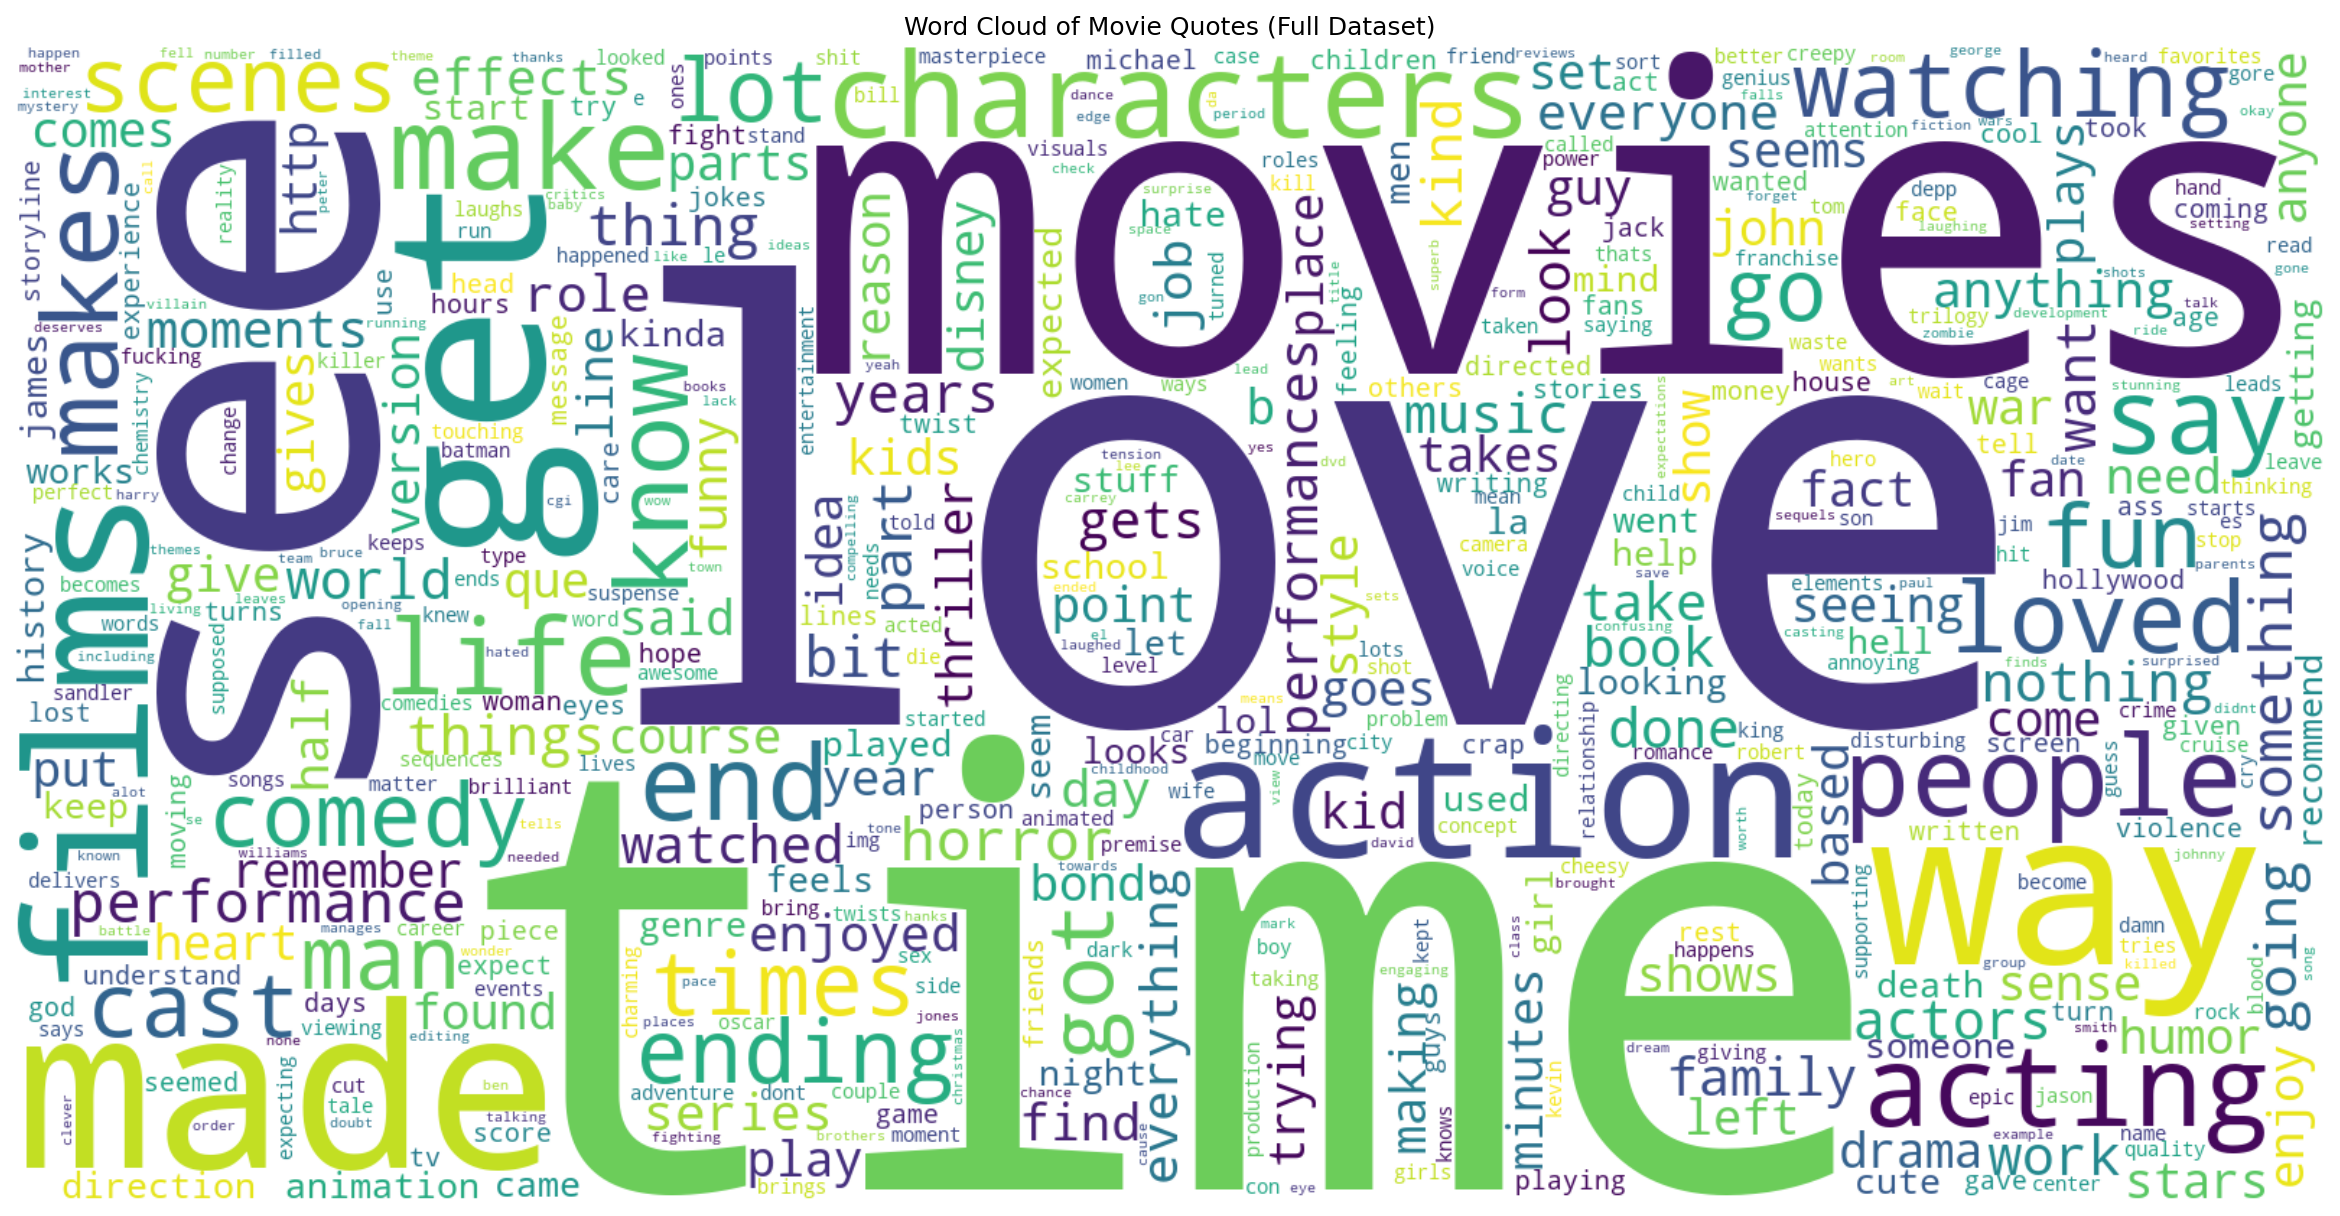

In [41]:
from collections import Counter
import time
import gc
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to process quotes in chunks
def process_quotes_chunk(chunk):
    return Counter(' '.join(chunk).split())

# Load and process data in chunks
chunk_size = 1000
word_freq = Counter()

print("Processing quotes in chunks...")
start_time = time.time()

for i in range(0, len(df), chunk_size):
    # Use .copy() to avoid the warning
    chunk = df.iloc[i:i + chunk_size].copy()
    chunk['filtered_quotes'] = chunk['filtered_quotes'].fillna('').astype(str)
    chunk = chunk[chunk['filtered_quotes'] != '']
    word_freq.update(process_quotes_chunk(chunk['filtered_quotes']))
    
    # Clear memory
    del chunk
    gc.collect()

end_time = time.time()
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Keep only frequent words
min_freq = 10
frequent_words = {word: count for word, count in word_freq.items() if count > min_freq}

print(f"Total unique words: {len(word_freq)}")
print(f"Words appearing more than {min_freq} times: {len(frequent_words)}")

# Create word cloud
wordcloud = WordCloud(width=1600, height=800,
                      background_color='white',
                      max_words=500,
                      relative_scaling=0.5).generate_from_frequencies(frequent_words)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Quotes (Full Dataset)')
plt.show()

In [42]:
# Separate good and bad movies
median_score = df['average_combined_score'].median()
good_movies = df[df['average_combined_score'] > median_score]
bad_movies = df[df['average_combined_score'] <= median_score]

# Create bigram vectorizer
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')

# Get bigrams for good and bad movies
good_bigrams = vectorizer.fit_transform(good_movies['filtered_quotes'])
bad_bigrams = vectorizer.transform(bad_movies['filtered_quotes'])

# Calculate ratio of frequencies
good_freq = good_bigrams.sum(axis=0).A1
bad_freq = bad_bigrams.sum(axis=0).A1
ratio = np.log((good_freq + 1) / (bad_freq + 1))

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Sort by ratio and get top distinctive bigrams
top_good = sorted(zip(feature_names, ratio), key=lambda x: -x[1])[:20]
top_bad = sorted(zip(feature_names, ratio), key=lambda x: x[1])[:20]

print("Bigrams more associated with good movies:")
print(', '.join([f'"{bg}"' for bg, _ in top_good]))

print("\nBigrams more associated with bad movies:")
print(', '.join([f'"{bg}"' for bg, _ in top_bad]))

Bigrams more associated with good movies:
"love hepburn", "crying baseball", "john cazale", "spider pig", "montoya killed", "dodge wrench", "dench cate", "bobsled team", "wrench dodge", "pig spider", "ford president", "downey kilmer", "toga toga", "battle iwo", "grant hepburn", "steve wiebe", "sperm sacred", "hanks denzel", "sandler cheadle", "joy division"

Bigrams more associated with bad movies:
"quack quack", "grant drew", "danielle harris", "li jason", "power glove", "chris kattan", "price bitch", "carrey riddler", "love duff", "dax shepard", "tommy jarvis", "walker jessica", "hilton died", "sandler nicholson", "carrey lee", "jason space", "jackman rachel", "hilton dies", "bob barker", "motherfucking snakes"


Calculating median score...
Median score: 8.452627739427342
Total rows: 10191
Time taken to calculate median: 6.45 seconds
Processing quotes...


100%|██████████| 10191/10191 [00:43<00:00, 232.32row/s]


Time taken to process quotes: 43.87 seconds
Comparison with stopwords:

Distinctive words for Highly-Rated Movies:
miyazaki, hepburn, pacino, hitchcock, kubrick, kurosawa, leone, bogart, chaplin, brando, goodfellas, godfather, wilder, stewart, welles, bergman, anime, coen, almodovar, newman, sellers, hayao, westerns, audrey, lemmon, lynch, departed, corleone, marlon, fellini, wayne, akira, peck, schindler, mifune, polanski, scarface, totoro, casablanca, mononoke, godard, samurai, capra, morricone, pixar, orson, bacall, ganz, ennio, bates

Distinctive words for Poorly-Rated Movies:
bond, sandler, cage, cruise, twists, gore, blood, chemistry, zombie, books, williams, killer, romance, cgi, reviews, jack, vampire, carrey, jennifer, ben, adventure, murphy, surprised, sequels, suspense, confusing, robin, hero, comedies, jones, con, childhood, batman, manages, christmas, chance, talking, power, acted, material, le, supporting, hand, city, scared, worked, gone, wow, running, missing
Generating

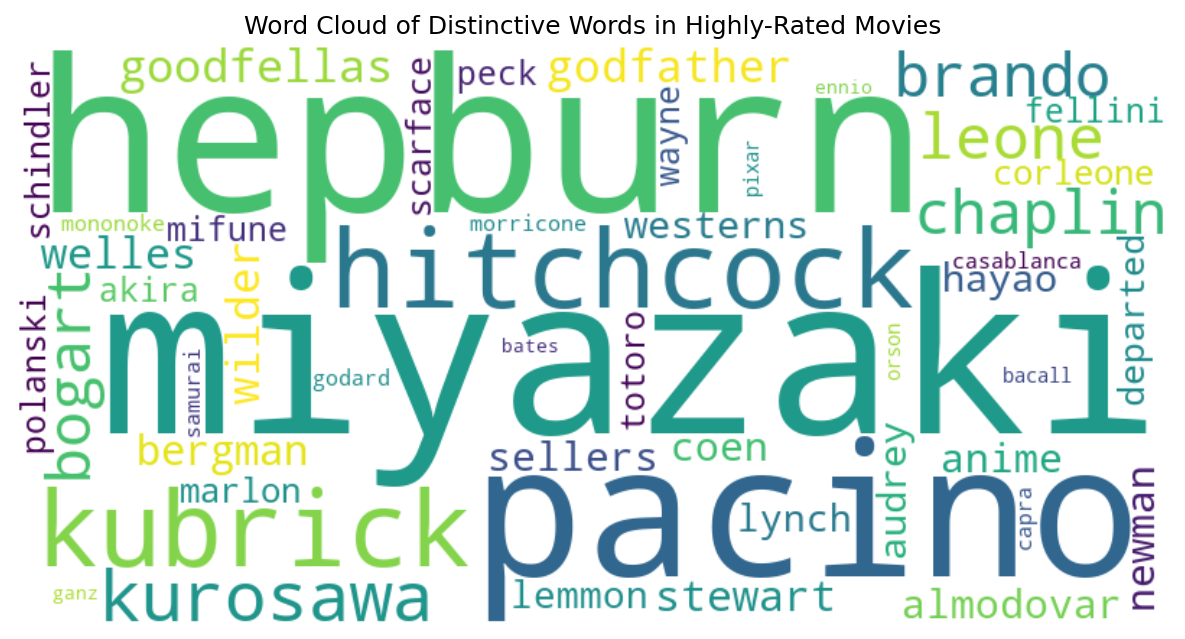

Word cloud for Word Cloud of Distinctive Words in Highly-Rated Movies has been displayed.
Generating word cloud for Word Cloud of Distinctive Words in Poorly-Rated Movies...


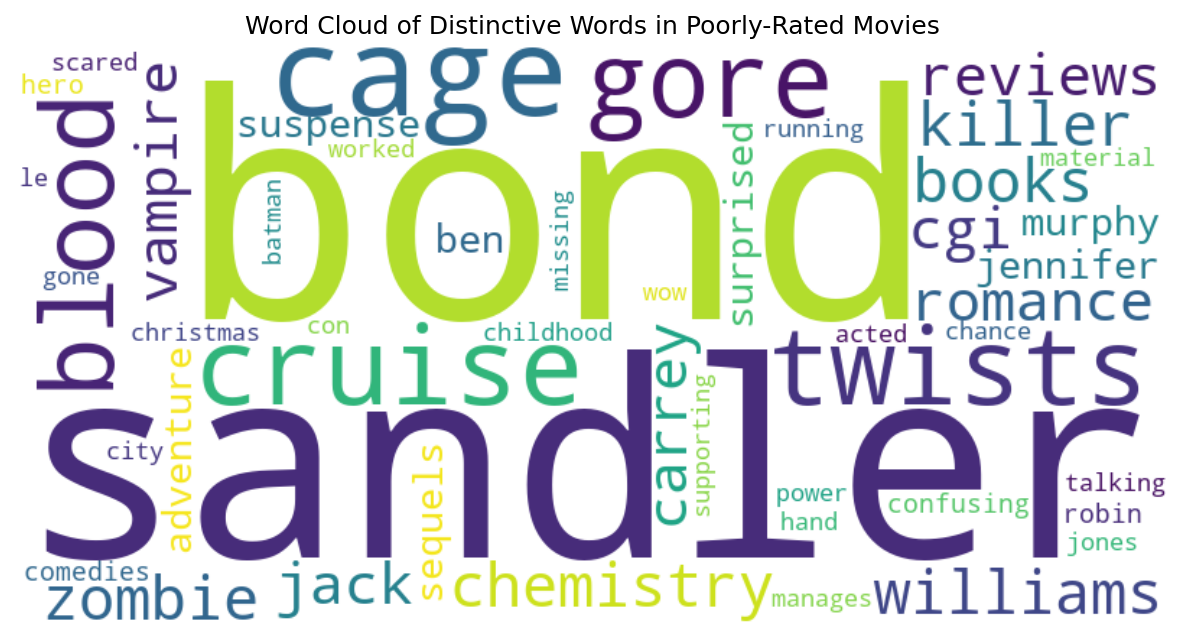

Word cloud for Word Cloud of Distinctive Words in Poorly-Rated Movies has been displayed.
Total execution time: 51.97 seconds
Script completed. Check the console output for results and any generated word clouds.


In [43]:
# Set this to True to create word clouds
CREATE_WORD_CLOUD = True
CUSTOM_STOPWORDS = set([
    # General filler words that do not add distinctiveness
    'get', 'got', 'make', 'made', 'see', 'go', 'going', 'take', 'want', 'know',
    'look', 'find', 'remember', 'came', 'come', 'comes', 'getting', 'done',
    'trying', 'need', 'kept', 'work', 'used', 'went', 'felt',
    'little', 'big', 'best', 'good', 'fun', 'lot', 'lots', 'thing', 'things',
    'everything', 'anything', 'nothing', 'play', 'played', 'plays', 'playing',
    'part', 'parts', 'left', 'end', 'ending', 'line', 'based', 'version',
    'sort', 'kind', 'seem', 'seems', 'feels', 'felt', 'place', 'places',
    'wait', 'waiting', 'given', 'giving', 'took', 'turn', 'turns',
    'moment', 'moments', 'viewing', 'john', 'stars', 'effects', 'keep',
    'lines', 'story', 'plot', 'told', 'tell', 'telling', 'seen',
    'sense', 'coming', 'couple', 'shows', 'piece', 'moving', 'mind', 'style',
    'hate', 'lol', 'looking', 'hell', 'kid', 'night', 'game', 'jokes', 'kinda', 'wanted',
    'stuff', 'let', 'girl', 'looks', 'b', 'hate', 'kid', 'night', 'movies', 'thriller', 'humor',
    'lol', 'expect', 'tv', 'recommend', 'fans', 'someone', 'care', 'school', 'ass', 'death', 'start',
    'michael', 'twist', 'seemed', 'rest', 'money', 'house', 'beginning', 'la',
    'works', 'try', 'lost', 'others', 'genre', 'concept', 'guess', 'premise', 'expecting', 'creepy',
    'jason', 'act', 'sex', 'animation', 'score', 'experience', 'written', 'hollywood', 'directed',
    'brilliant', 'camera', 'violence', 'fight', 'hope', 'gave', 'read', 'understand', 'god', 'face', 'children',

    # General and evaluative terms without specific value
    'movies', 'time', 'way', 'characters', 'acting', 'scenes', 'cast', 'times',
    'something', 'watched', 'actors', 'role', 'makes', 'say', 'book', 'series', 'films',
    'performance', 'performances', 'job', 'music', 'fun', 'enjoyed', 'history', 'war',
    'action', 'drama', 'gets', 'bit', 'enjoy', 'half', 'reason', 'fact', 'idea', 'script',
    'scene', 'scenes', 'storyline', 'director', 'help', 'anyone', 'gives', 'course',

    # Evaluative words without context
    'oscar', 'masterpiece', 'genius', 'epic', 'superb', 'perfect', 'stunning',
    'crap', 'shit', 'waste', 'beautiful', 'annoying', 'cheesy', 'great', 'funny', 'awesome',
    'fantastic', 'bad', 'terrible', 'awful', 'wonderful', 'amazing', 'interesting',

    # Overly broad descriptors
    'man', 'woman', 'people', 'guys', 'girls', 'family', 'kids', 'ladies', 'men', 'friends',
    'today', 'life', 'years', 'days', 'day', 'minutes', 'hours', 'age',
    'cool', 'laugh', 'laughs', 'laughing', 'smile', 'cute', 'nice',

    # Words without distinctive value in quality differentiation
    'love', 'loved', 'comedy', 'horror', 'guy', 'everyone', 'show', 'fan', 'seeing',
    'making', 'point', 'found', 'expected', 'said', 'give', 'put', 'takes',
    'set', 'goes', 'year', 'heart', 'watching', 'world', 'direction', 'que', 'disney',

    # Additional words to add to CUSTOM_STOPWORDS:
    'franchise', 'james', 'tom', 'smith',
    'problem', 'thinking', 'sequences', 'dont', 'better', 'jim',
    'rock', 'kill', 'car', 'head', 'happened', 'use', 'person', 'ones',
    'critics', 'save', 'keeps', 'stop', 'tries', 'message', 'points',
    'supposed', 'stories', 'entertainment', 'starts', 'looked', 'started',
    'okay', 'son', 'turned', 'kevin', 'landmark', 'oscars', 'division',
    'firefly', 'pianist', 'mean', 'sucked', 'needed', 'worth', 'fucking',
    'hated', 'disturbing', 'ok', 'sucks', 'laughed', 'happens', 'saying',
    'needs', 'wants', 'taking', 'leave', 'cry', 'called', 'becomes', 'happen',
    'run', 'gon', 'says', 'falls', 'become', 'taking', 'case', 'side', 'ways',
    'gene', 'hitler', 'mozart', 'gandhi', 'brandon', 'howl', 'dean',
    'grail', 'marx', 'salieri', 'kinski', 'hawks', 'lamotta', 'atticus',
    'timeless', 'sunset', 'sunrise', 'boxing', 'ewoks', 'bjork',
    'plainview', 'gael', 'spaghetti', 'attention', 'feeling', 'roles', 'type',
    'name', 'thats', 'eyes',
    'ends', 'hit', 'screen', 'move', 'cut', 'voice', 'ended', 'team',
    'e', 'interest', 'cause', 'dance', 'taken', 'es', 'friend',
    'elements', 'check', 'center', 'yes', 'knew', 'gangster', 'western', 'python', 'noir',
    'mob', 'guinness', 'raging',
    'criterion', 'vietnam', 'falcon', 'fargo', 'murrow', 'maude', 'harvey',
    'spirited', 'strangelove', 'cagney', 'bueller', 'travis', 'bueller',
    'rwanda', 'mcmurphy', 'falcon', 'landau', 'pekars',  'altman', 'stanley', 'criterion',
    'criterion', 'criterion', 'fargo',
    'musicals', 'technicolor', 'indemnity', 'masterpieces', 'barton',
    'searchers', 'louise', 'rains', 'vienna', 'serenity', 'vito', 'pesci',
    'braddock', 'kane', 'katharine', 'cleef', 'benigni', 'vivien',
    'andrews', 'sergio', 'benigni', 'andrews', 'toshio',
    'writing', 'die', 'stand', 'bring', 'alot', 'visuals', 'killed', 'wife',
    'yeah', 'delivers', 'harry', 'lack', 'development', 'child', 'mark',
    'change', 'video', 'chris', 'brings',
    'img', 'decent', 'quality', 'dvd', 'surprise', 'scares', 'da', 'ideas',
    'matter', 'damn', 'fell', 'villain', 'production', 'lead', 'casting',
    'leads', 'expectations', 'relationship', 'ride', 'knows', 'effort',
    'songs', 'parents', 'means', 'admit', 'fighting', 'dog', 'jackson',
    'bill', 'please', 'attempt', 'lacks', 'dark', 'events', 'group', 'pretty',
    'wonder', 'mess', 'level', 'pero', 'fails', 'song', 'wests', 'mcmurpow',
    'chick', 'women', 'adam', 'boy', 'king', 'didnt',

])


# Set this to True to create word clouds
CREATE_WORD_CLOUD = True

# Combine with standard stopwords
ALL_STOPWORDS = set(STOPWORDS).union(CUSTOM_STOPWORDS)

OPWORDS = set(STOPWORDS).union(CUSTOM_STOPWORDS)

# Tokenizer to use for both positive and negative reviews
tokenizer = re.compile(r'\b\w+\b')

def process_data_in_chunks(file_path, chunk_size=1000):
    positive_counter = Counter()
    negative_counter = Counter()
    median_score = None
    total_rows = 0

    print("Calculating median score...")
    start_time = time.time()
    for chunk in pd.read_csv(file_path, chunksize=chunk_size, encoding='utf-8'):
        chunk = chunk[chunk['filtered_quotes'].notna() & (chunk['filtered_quotes'] != '')]
        total_rows += len(chunk)
        if median_score is None:
            median_score = chunk['average_combined_score'].median()

    print(f"Median score: {median_score}")
    print(f"Total rows: {total_rows}")
    print(f"Time taken to calculate median: {time.time() - start_time:.2f} seconds")

    print("Processing quotes...")
    start_time = time.time()

    with tqdm(total=total_rows, unit='row') as pbar:
        for chunk in pd.read_csv(file_path, chunksize=chunk_size, encoding='utf-8'):
            chunk = chunk[chunk['filtered_quotes'].notna() & (chunk['filtered_quotes'] != '')]

            positive_chunk = chunk[chunk['average_combined_score'] > median_score]['filtered_quotes']
            negative_chunk = chunk[chunk['average_combined_score'] <= median_score]['filtered_quotes']

            # Use the same tokenizer for both positive and negative quotes
            positive_counter.update(word.lower() for quote in positive_chunk for word in tokenizer.findall(quote) if word.lower() not in ALL_STOPWORDS)
            negative_counter.update(word.lower() for quote in negative_chunk for word in tokenizer.findall(quote) if word.lower() not in ALL_STOPWORDS)

            pbar.update(len(chunk))

            del chunk, positive_chunk, negative_chunk
            gc.collect()

    print(f"Time taken to process quotes: {time.time() - start_time:.2f} seconds")
    return positive_counter, negative_counter

def compare_word_frequencies(counter1, counter2):
    word_diff = Counter()
    for word in set(counter1.keys()).union(counter2.keys()):
        word_diff[word] = counter1.get(word, 0) - counter2.get(word, 0)
    return word_diff

def create_word_cloud(counter, title):
    if not CREATE_WORD_CLOUD:
        print("Word cloud creation is disabled.")
        return

    try:
        print(f"Generating word cloud for {title}...")
        # Adjust the parameters to ensure all words are visible
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='white',
            max_words=200,  # Increase to include more words
            relative_scaling=0.5,  # Adjust scaling to give less frequent words a better chance
            min_font_size=5,  # Ensure smaller words are still displayed
            stopwords=set()  # Avoid automatic filtering
        ).generate_from_frequencies(counter)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title)
        plt.show()
        plt.close()
        print(f"Word cloud for {title} has been displayed.")
    except Exception as e:
        print(f"Failed to generate word cloud for {title}. Error: {e}")

def create_filtered_counter(word_diff, condition='positive', top_n=100):
    filtered_counter = Counter()
    if condition == 'positive':
        filtered_words = {word: diff for word, diff in word_diff.items() if diff > 0}
    elif condition == 'negative':
        filtered_words = {word: -diff for word, diff in word_diff.items() if diff < 0}
    else:
        raise ValueError("Condition must be either 'positive' or 'negative'")

    # Sort and get the top_n words
    top_words = dict(sorted(filtered_words.items(), key=lambda x: -x[1])[:top_n])
    filtered_counter.update(top_words)
    return filtered_counter

def print_distinctive_words(counter, title):
    distinctive_words = list(counter.keys())
    print(f"\nDistinctive words for {title}:")
    print(", ".join(distinctive_words))

# Main execution (updated for clarification)
start_time = time.time()
positive_counter, negative_counter = process_data_in_chunks('processed_movie_quotes.csv')

print("Comparison with stopwords:")
word_diff = compare_word_frequencies(positive_counter, negative_counter)

# Create filtered counters for distinctive words
distinctive_positive_counter = create_filtered_counter(word_diff, condition='positive', top_n=50)
distinctive_negative_counter = create_filtered_counter(word_diff, condition='negative', top_n=50)

# Print the distinctive words for your reference
print_distinctive_words(distinctive_positive_counter, "Highly-Rated Movies")
print_distinctive_words(distinctive_negative_counter, "Poorly-Rated Movies")

# Generate word clouds for distinctive positive and negative words
if CREATE_WORD_CLOUD:
    create_word_cloud(distinctive_positive_counter, 'Word Cloud of Distinctive Words in Highly-Rated Movies')
    create_word_cloud(distinctive_negative_counter, 'Word Cloud of Distinctive Words in Poorly-Rated Movies')

# Clear memory
del positive_counter, negative_counter
gc.collect()

print(f"Total execution time: {time.time() - start_time:.2f} seconds")
print("Script completed. Check the console output for results and any generated word clouds.")

Generating word cloud for Word Cloud of Distinctive Words in Highly-Rated Movies...


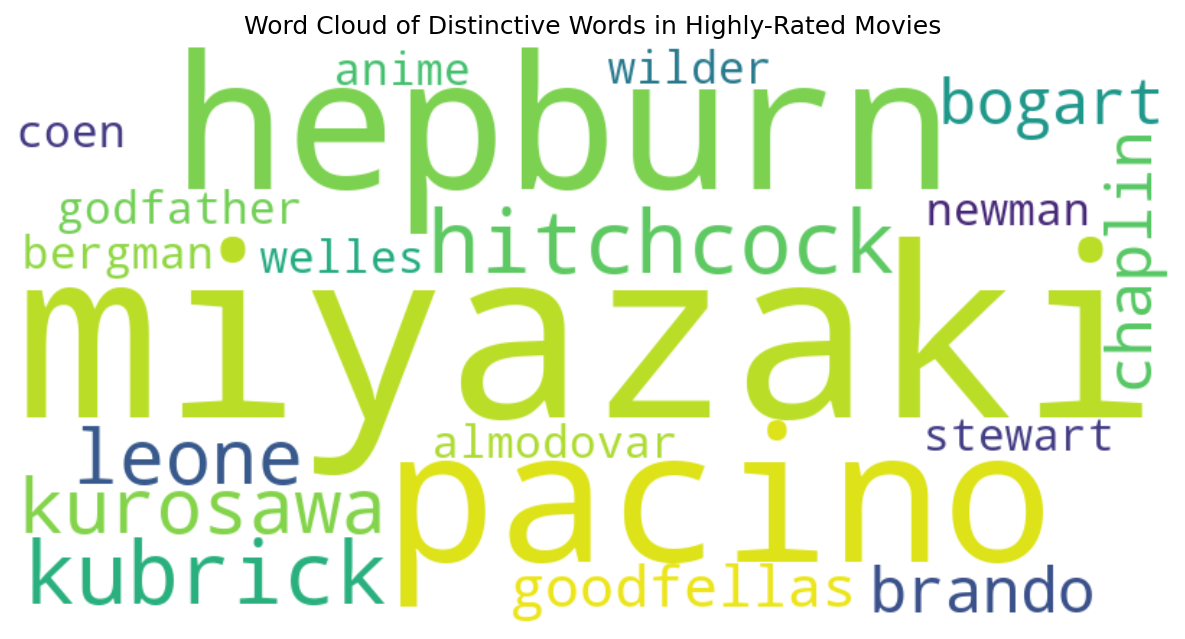

Word cloud for Word Cloud of Distinctive Words in Highly-Rated Movies has been displayed.


In [44]:
# Top 20 word lists
highly_rated_top_20 = [
    'miyazaki', 'hepburn', 'pacino', 'hitchcock', 'kubrick', 'kurosawa',
    'leone', 'bogart', 'chaplin', 'brando', 'goodfellas', 'godfather',
    'wilder', 'stewart', 'welles', 'bergman', 'anime', 'coen',
    'almodovar', 'newman'
]

poorly_rated_top_20 = [
    'bond', 'sandler', 'cage', 'cruise', 'twists', 'gore', 'blood',
    'chemistry', 'zombie', 'williams', 'killer', 'romance', 'cgi',
    'vampire', 'carrey', 'adventure', 'murphy', 'surprised',
    'sequels', 'suspense', 'confusing'
]

# Create Counter objects for the word cloud
highly_rated_counter = Counter({word: 1 for word in highly_rated_top_20})
poorly_rated_counter = Counter({word: 1 for word in poorly_rated_top_20})

# Generate word clouds
create_word_cloud(highly_rated_counter, 'Word Cloud of Distinctive Words in Highly-Rated Movies')

Generating word cloud for Word Cloud of Distinctive Words in Poorly-Rated Movies...


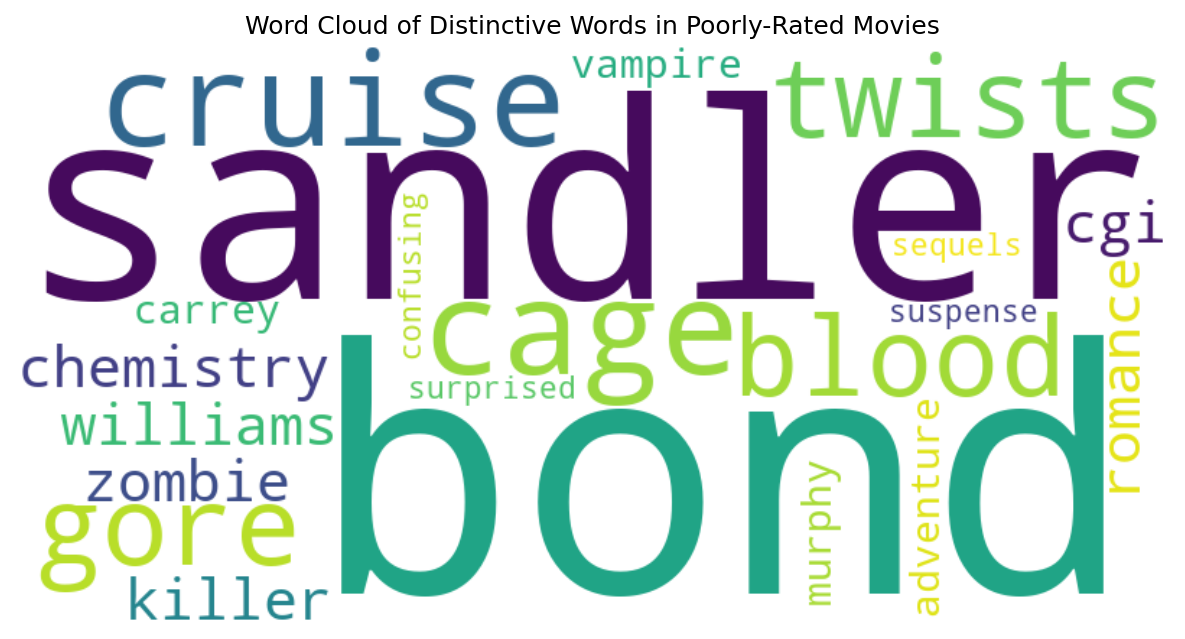

Word cloud for Word Cloud of Distinctive Words in Poorly-Rated Movies has been displayed.


In [45]:
create_word_cloud(poorly_rated_counter, 'Word Cloud of Distinctive Words in Poorly-Rated Movies')

### 5.2.3. NLP Results

The most distinctive words in highly-rated movies included notable directors like "Miyazaki" and "Hitchcock" as well as iconic actors like "Pacino" and "Hepburn." These names suggest that well-known talents significantly contribute to a movie's success. On the other hand, poorly-rated movies had themes like "gore," "zombie," and "sequels," indicating that certain genres or types of movies tend to receive more critical reviews.

Insights:
- Highly-Rated Movies: The distinctive words associated with highly-rated movies included notable names such as "Miyazaki," "Hitchcock," "Kubrick," and "Bergman." This suggests that acclaimed directors and actors are frequently linked to movies that perform well. Themes like "anime" and "coen" indicate that certain genres or production styles resonate positively with audiences.

- Poorly-Rated Movies: The most distinctive words for poorly-rated movies included "sandler," "cage," "gore," and "zombie." These words suggest that movies featuring certain actors or focusing on specific genres, such as horror, are more likely to receive critical reviews. Words like "sequels" and "twists" also imply that poorly-executed plot twists or over-reliance on sequels may contribute to lower ratings.

These insights help us understand the elements that audiences and critics find appealing or off-putting, providing valuable guidance for movie creators looking to enhance their content and reach wider acclaim.

## 6. Conclusion

This project has been an insightful exploration into the world of data, with significant tasks undertaken and key topics examined in depth. The work demonstrates advanced techniques in data cleaning, manipulation, and visualization. Functions were employed to optimize the code, reducing redundancy and improving overall readability. The data visualization component provided clear and immediate insights into the most popular movies in the industry, utilizing interactive graphs to enhance the presentation and efficiently manage space.

The "Data Science" section highlighted the power of analytical methods in uncovering patterns that are applicable to real-world scenarios.

Furthermore, merging multiple datasets into a cohesive whole was a key element of the project, showcasing an important skill in data analysis. This merged dataset was effectively used in the NLP section to analyze both critic and user reviews, delivering valuable insights into sentiment and opinion within the movie industry.